# Cryptocurrency Dataset

The dataset is provided to us by our professor, Kedar Sir. It has been synthetically generated and has the seven aforementioned variables. Our reason for taking the dataset were rather simple and straight-forward:
- It has high-frequency data as the market stays open 24x7.
- It has a strong real-life application and relevance in business and finance.
- Its volatility is infamous, and thus provides a good challenge for us both.

The aim of this project is to be able to forecast the Close_Price of cryptocurrency for a particular period of time.


# Variable Explanation

**Date**: The calendar date for that particular record.

**Open_Price**: The price of the cryptocurrency at the beginning of the day. What price did the market open with?

**High_Price**: The highest price the cyrptocurrency reached during the day.

**Low**: The lowest price the cyrptocurrency dropped to during the day.

**Close_Price**: The price of the cryptocurrency at the end of the day. What price did the market close with?

**Volume**: The total number of coins (or value in currency) traded during the day.

**Moving_Avg_7**: The 7-day moving average of the closing price.

**Moving_Avg_30**: The 30-day moving average of the closing price.

**Volatility**: A measure of how much the price fluctuates during the day. High value means large swings in prices within the same day, a quality the cryptocurrency seems to own.

**RSI (Relative Strength Index)**
- RSI > 70: Asset is considered overbought (might go down soon). Suggests a *sell* opportunity as an asset's price may be temporarily high and could be due for a price correction or reversal.
- RSI < 30: Asset is considered oversold (might go up soon). Suggests a *buy* opportunity as the price may be undervalued or due for a rebound.

---




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning, InterpolationWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', InterpolationWarning)


## Loading Dataset

In [3]:
logdf = pd.read_csv("synthetic_cryptocurrency_data.csv")
logdf.head()

,Date,Open_Price,High_Price,Low_Price,Close_Price,Volume,Moving_Avg_7,Moving_Avg_30,Volatility,RSI
0,1990-01-01,50381.597367,52295.056945,48754.706054,49450.823866,2476,49450.823866,49450.823866,0.025218,54.235666
1,1990-01-02,49406.824884,51105.446544,48256.739542,49753.953192,1778,49753.953192,49753.953192,0.064403,43.682185
2,1990-01-03,49584.138601,52017.231849,47190.477908,49053.475894,4515,49053.475894,49053.475894,0.054559,65.493205
3,1990-01-04,48083.511999,50282.266911,46404.496989,47133.680242,2180,47133.680242,47133.680242,0.082038,67.813627
4,1990-01-05,47247.201554,49540.890965,46097.467055,47679.504870,1798,47679.504870,47679.504870,0.092261,45.025906


In [4]:
import numpy as np

logdf['Close_Price_log'] = np.log(logdf['Close_Price'])


In [5]:
logdf.head()

,Date,Open_Price,High_Price,Low_Price,Close_Price,Volume,Moving_Avg_7,Moving_Avg_30,Volatility,RSI,Close_Price_log
0,1990-01-01,50381.597367,52295.056945,48754.706054,49450.823866,2476,49450.823866,49450.823866,0.025218,54.235666,10.808734
1,1990-01-02,49406.824884,51105.446544,48256.739542,49753.953192,1778,49753.953192,49753.953192,0.064403,43.682185,10.814845
2,1990-01-03,49584.138601,52017.231849,47190.477908,49053.475894,4515,49053.475894,49053.475894,0.054559,65.493205,10.800666
3,1990-01-04,48083.511999,50282.266911,46404.496989,47133.680242,2180,47133.680242,47133.680242,0.082038,67.813627,10.760743
4,1990-01-05,47247.201554,49540.890965,46097.467055,47679.504870,1798,47679.504870,47679.504870,0.092261,45.025906,10.772257


In [6]:
logdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12784 entries, 0 to 12783
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             12784 non-null  object 
 1   Open_Price       12784 non-null  float64
 2   High_Price       12784 non-null  float64
 3   Low_Price        12784 non-null  float64
 4   Close_Price      12784 non-null  float64
 5   Volume           12784 non-null  int64  
 6   Moving_Avg_7     12784 non-null  float64
 7   Moving_Avg_30    12784 non-null  float64
 8   Volatility       12784 non-null  float64
 9   RSI              12784 non-null  float64
 10  Close_Price_log  12784 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 1.1+ MB


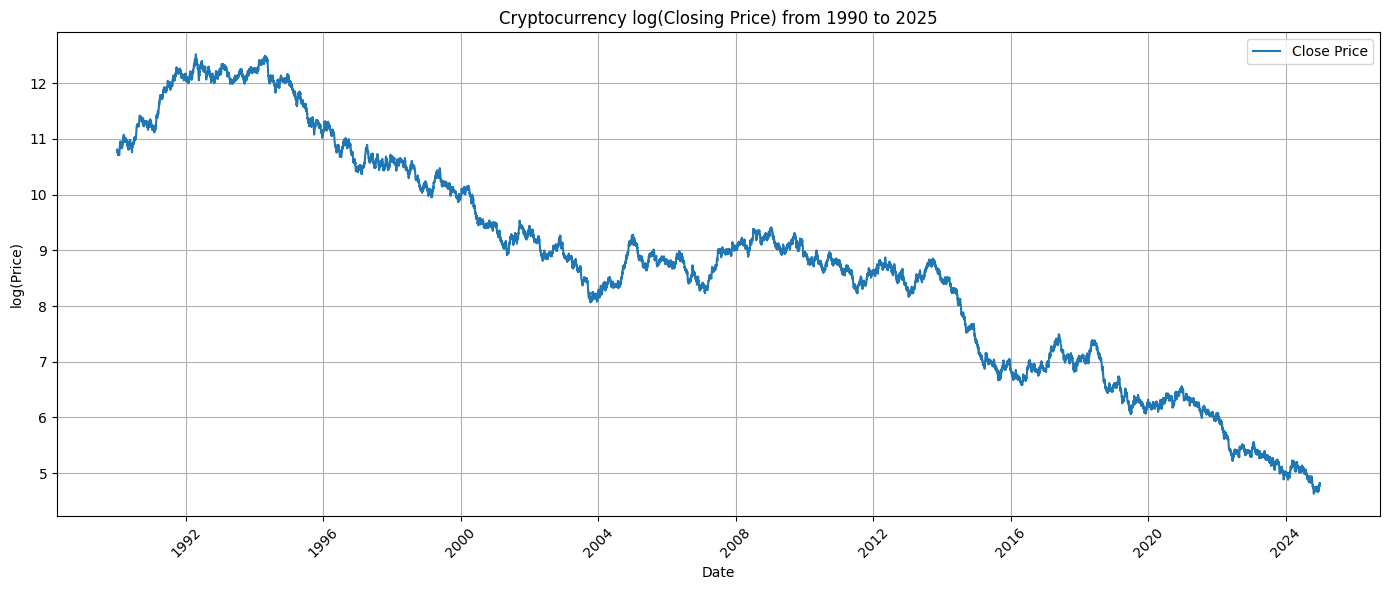

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Date' is in datetime format
logdf['Date'] = pd.to_datetime(logdf['Date'])

# Plotting the Close Price and existing 30-day Moving Average
plt.figure(figsize=(14,6))
plt.plot(logdf['Date'], logdf['Close_Price_log'], label='Close Price')

plt.title('Cryptocurrency log(Closing Price) from 1990 to 2025')
plt.xlabel('Date')
plt.ylabel('log(Price)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Before moving ahead, a general visualisation of the model lets one explore general trend, seasonality, patterns, outliers, etc. As observed orignally observed in our dataset:
- It is very top-heavy. As in, the volatility of the dataset is exponentially more in the past than what it is in the current time. 
- There is no general seasonality visible at first sight.
- There ar eo missing values or 'strange' values.

However, with the log trasnformation set on the Close_Price, there is a clear log-term decline. Even past the log-transformation, the volatility present in the dataset is quite evident.

## Exploratory Data Analysis: Get to know our data!

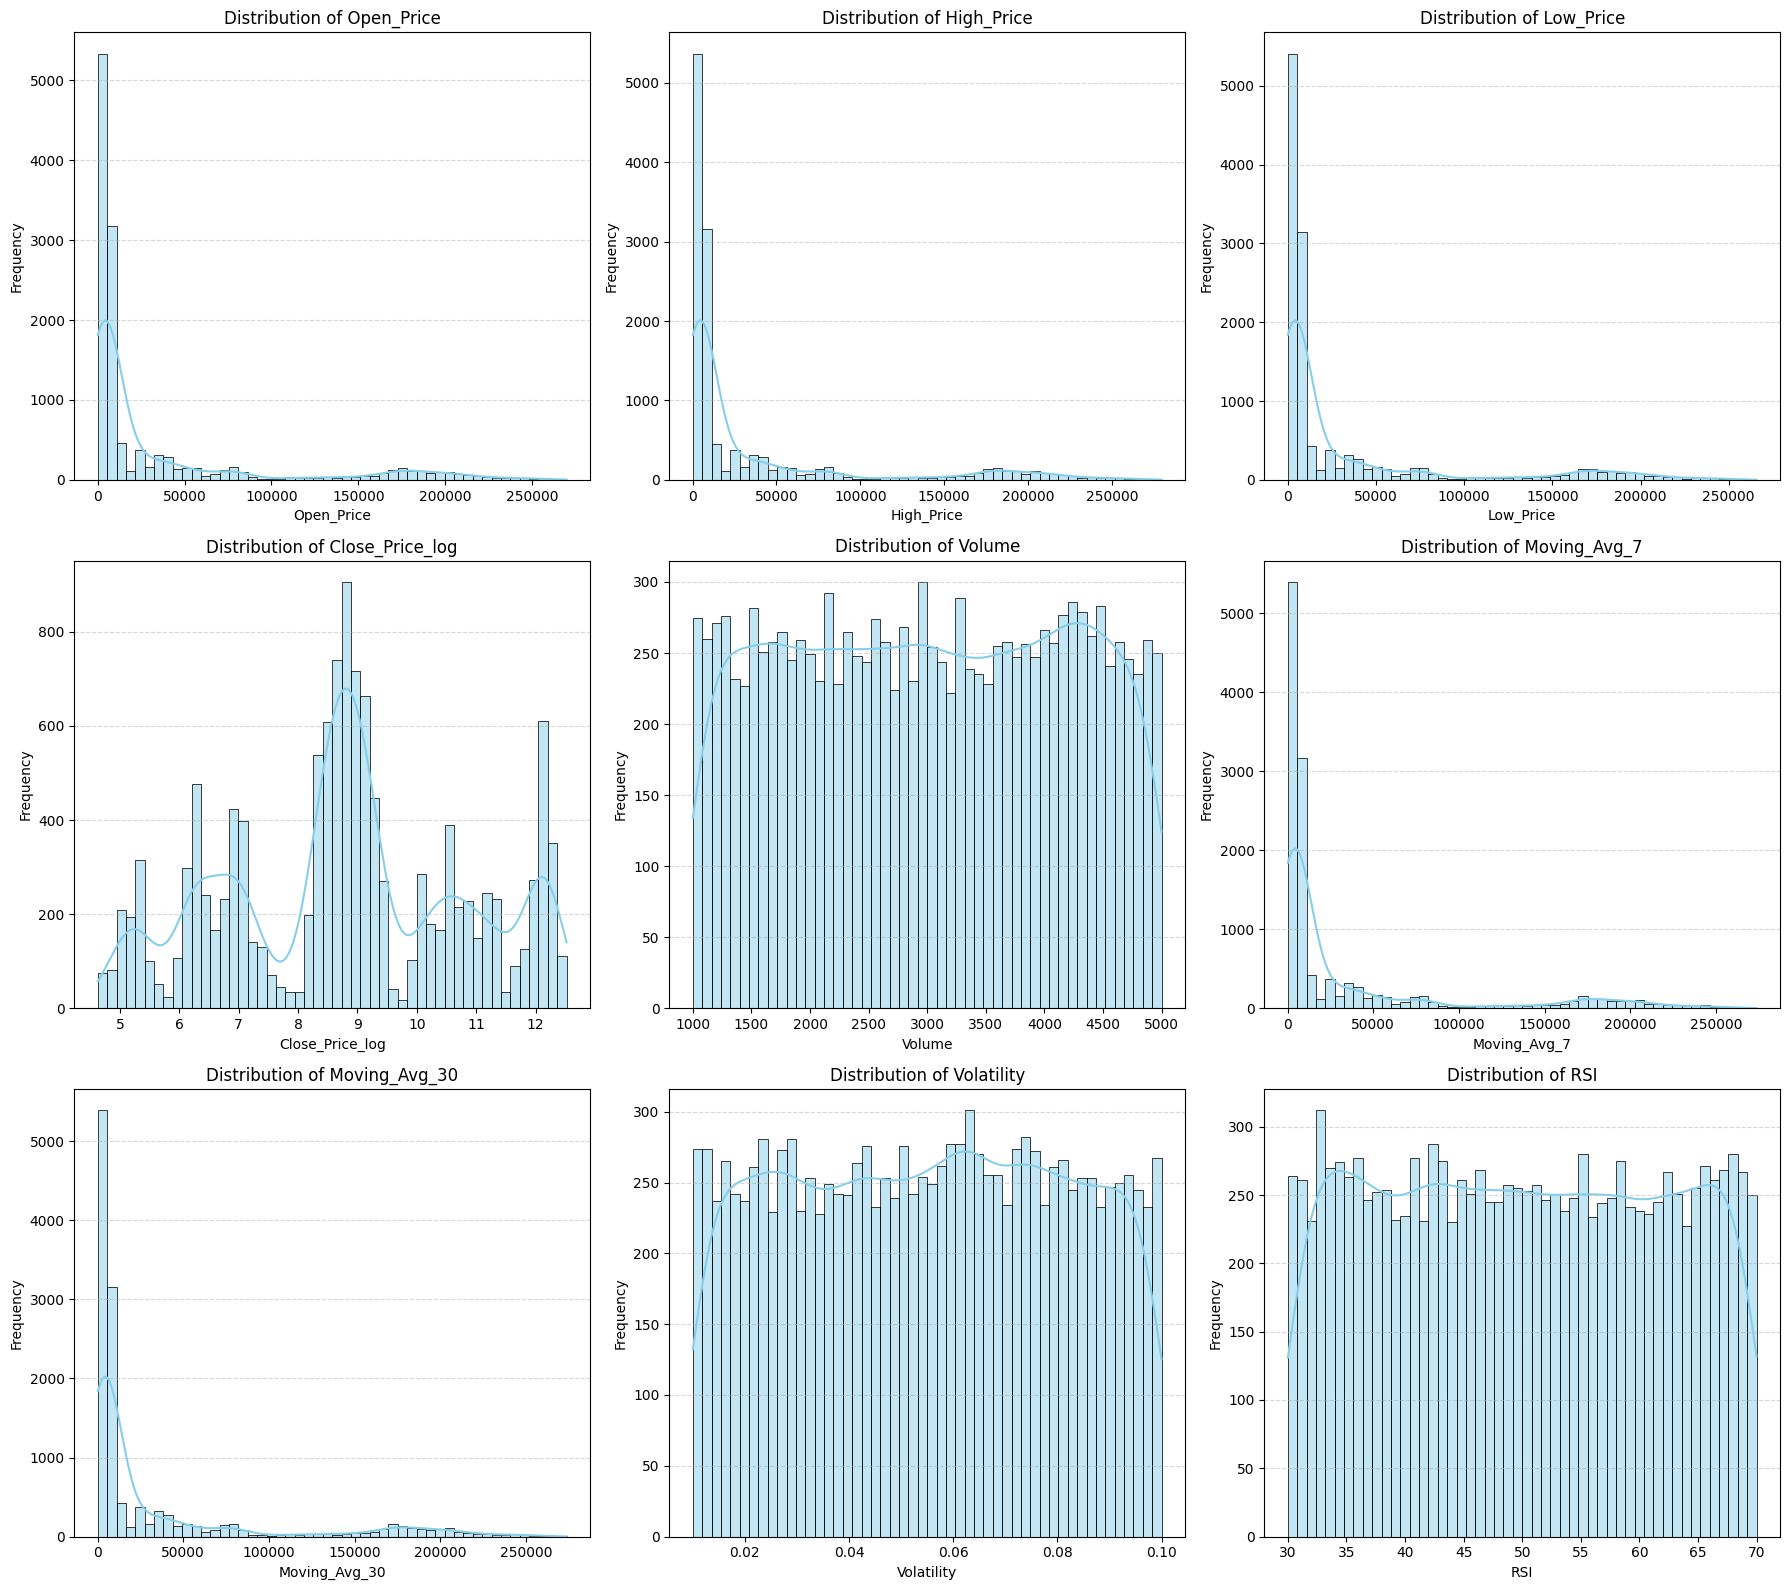

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric features to plot
features = [
    'Open_Price', 'High_Price', 'Low_Price', 'Close_Price_log', 'Volume',
    'Moving_Avg_7', 'Moving_Avg_30', 'Volatility', 'RSI'
]

# Set up the plot grid
plt.figure(figsize=(18, 16))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(logdf[feature], kde=True, bins=50, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Open_Price, High_Price, Low_Price:
- They all exhibit highly right skewed distribution. 
- But, majority of the values are in the lower clusters that barely reach 500. This highlights that msot of the trading happened at the lower trading levels with spikes due to, perhaps, anomolous periods.

Volume:
- It exhbits an even distribution with no clear pattern or strong skew. 
- It highlights that the trading must be equally distributed amongst the values either by default or due to some capping or binnding.

Moving_Avg_7 and Moving_Avg_30 :
- They also exhibit highly-right skew and follow the general pattern and category of Open_Price, High_Price, Low_Price, and Close_Price. It is expected, as it is calculated via the rolling window feature on the Close_Price.

Volatility:
- It seems to have a uniform distribution.
- Indicates the varying level of price fluctuations present across the dataset. 

RSI:
- By definition it is within the range of 0 to 100, yet intrestingly enough it very clearlys tays between the range of 30 to 70 in the dataset. 

### Period exploration

In [9]:
print("Period covered in dataset:", logdf['Date'].min(), "to", logdf['Date'].max())

Period covered in dataset: 1990-01-01 00:00:00 to 2024-12-31 00:00:00


In [10]:
# Create time-related columns from the 'Date' column. Year already created for RSI Label
logdf['year'] = logdf['Date'].dt.year
logdf['month'] = logdf['Date'].dt.month
logdf['day'] = logdf['Date'].dt.dayofyear
logdf['weekday'] = logdf['Date'].dt.weekday  # Monday = 0, Sunday = 6
logdf['year_month'] = logdf['Date'].apply(lambda x: f"{x.year}-{x.month:02d}")  # cleaner format like 2021-07


In [11]:
logdf.head(10)

,Date,Open_Price,High_Price,Low_Price,Close_Price,Volume,Moving_Avg_7,Moving_Avg_30,Volatility,RSI,Close_Price_log,year,month,day,weekday,year_month
0,1990-01-01,50381.597367,52295.056945,48754.706054,49450.823866,2476,49450.823866,49450.823866,0.025218,54.235666,10.808734,1990,1,1,0,1990-01
1,1990-01-02,49406.824884,51105.446544,48256.739542,49753.953192,1778,49753.953192,49753.953192,0.064403,43.682185,10.814845,1990,1,2,1,1990-01
2,1990-01-03,49584.138601,52017.231849,47190.477908,49053.475894,4515,49053.475894,49053.475894,0.054559,65.493205,10.800666,1990,1,3,2,1990-01
3,1990-01-04,48083.511999,50282.266911,46404.496989,47133.680242,2180,47133.680242,47133.680242,0.082038,67.813627,10.760743,1990,1,4,3,1990-01
4,1990-01-05,47247.201554,49540.890965,46097.467055,47679.504870,1798,47679.504870,47679.504870,0.092261,45.025906,10.772257,1990,1,5,4,1990-01
5,1990-01-06,47038.899406,48328.326956,45984.969970,47100.006337,2961,47100.006337,47100.006337,0.059547,30.119253,10.760028,1990,1,6,5,1990-01
6,1990-01-07,47560.256183,48177.137347,46828.847897,46948.621699,3436,46948.621699,46948.621699,0.037968,31.883621,10.756809,1990,1,7,6,1990-01
7,1990-01-08,47064.433596,48964.806425,45798.151972,46918.497087,3715,46918.497087,46918.497087,0.063410,58.094563,10.756167,1990,1,8,0,1990-01
8,1990-01-09,47401.704712,49695.260432,46547.483792,47090.724427,1652,47090.724427,47090.724427,0.045035,40.302781,10.759831,1990,1,9,1,1990-01
9,1990-01-10,46466.613400,47917.118424,45796.733759,46328.708145,1835,46328.708145,46328.708145,0.038600,67.138831,10.743517,1990,1,10,2,1990-01


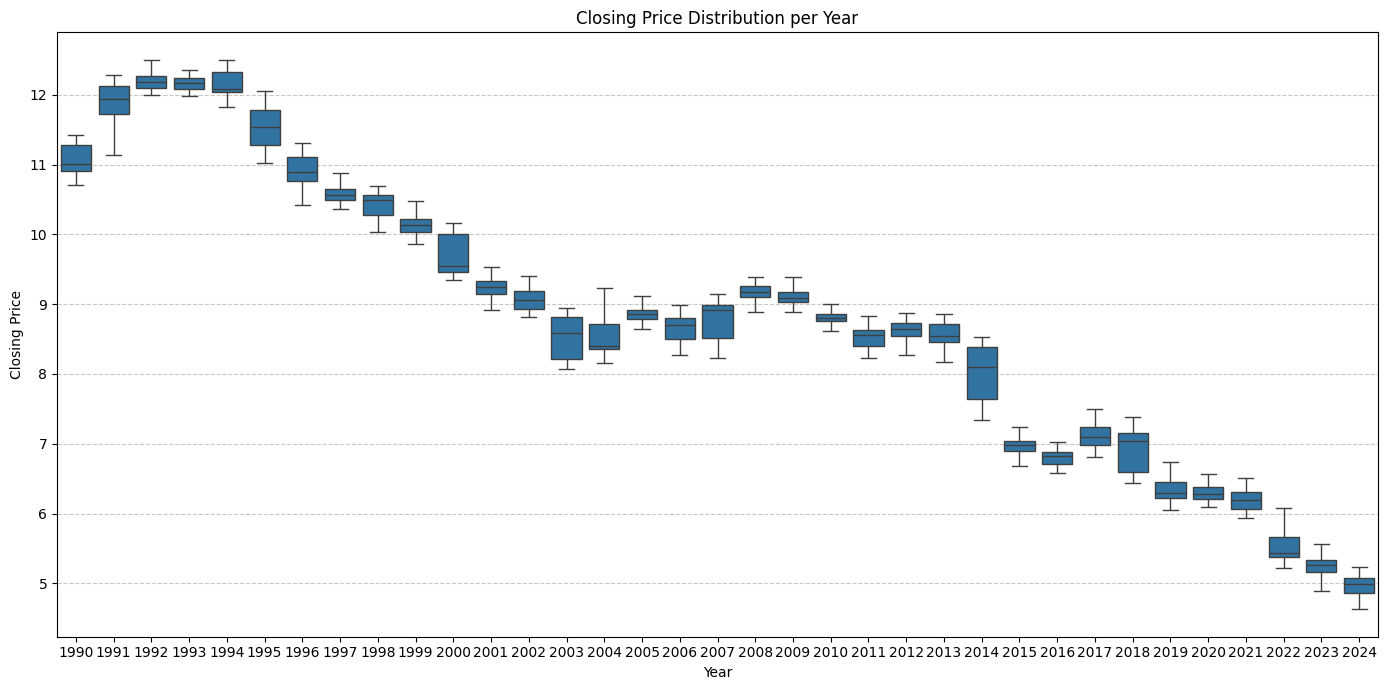

In [12]:
plt.figure(figsize=(14, 7))

# Base boxplot: distribution of daily closing prices per year
sns.boxplot(data=logdf, x='year', y='Close_Price_log', showfliers=False)


# Formatting
plt.title('Closing Price Distribution per Year')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


1. 1990–1995: Extremely High and Volatile Prices

- The boxes are tall and the whiskers wide, meaning there was a high spread in daily prices.

- The median was high, and the range stretched significantly — this suggests major volatility.

- Prices in these years fluctuated between very large ranges, typical of an immature or highly speculative market phase.

2. 1996–2000: A Gradual Decline in Median and Spread

- Both the median price and the interquartile range (IQR) are shrinking.

- The crypto market seems to have cooled off during this period, with less frequent wild price swings.

3. 2001–2010: Stable and Low Prices

- The boxes become flat and compressed.

- Prices stabilized at lower levels, indicating the asset entered a period of low volatility and market dormancy.

- Suggests less trading activity or speculative interest.

4. 2011–2024: Almost Flat Prices

- Boxplots are tiny and hover very close to zero.

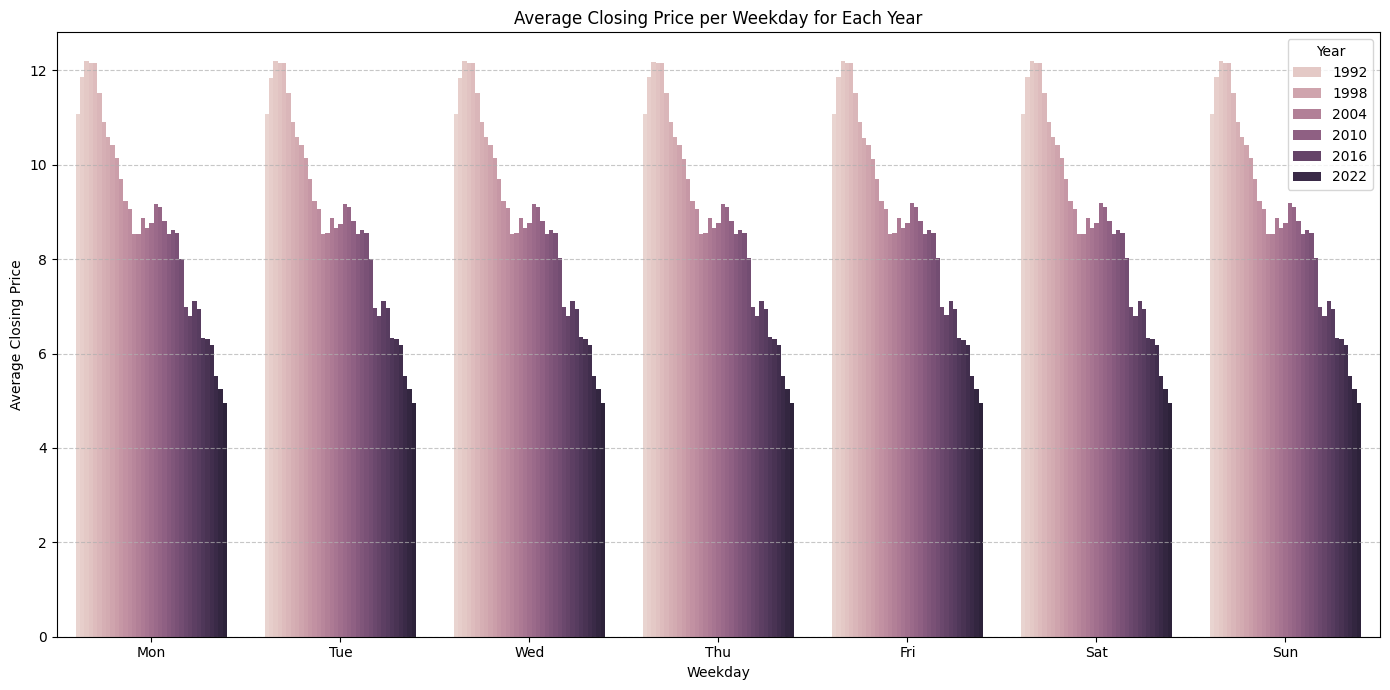

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map weekday numbers to names for readability
logdf['weekday_name'] = logdf['weekday'].map({
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
})

# Group by Year and Weekday
grouped = logdf.groupby(['year', 'weekday_name'])['Close_Price_log'].mean().reset_index()

# Sort weekday for consistent display
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plot using seaborn for grouped bars
plt.figure(figsize=(14, 7))
sns.barplot(data=grouped, x='weekday_name', y='Close_Price_log', hue='year', order=weekday_order)

# Formatting
plt.title('Average Closing Price per Weekday for Each Year')
plt.xlabel('Weekday')
plt.ylabel('Average Closing Price')
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- The plot shows average closing prices by weekday across selected years (1992–2022).

- Prices are consistently highest for all weekdays in 1992, gradually decreasing over the years — especially clear by 2022.

- No particular weekday shows a strong price bias — the price level appears largely uniform across Monday to Sunday within the same year.

- The chart highlights a long-term market decline rather than any significant weekday effect.

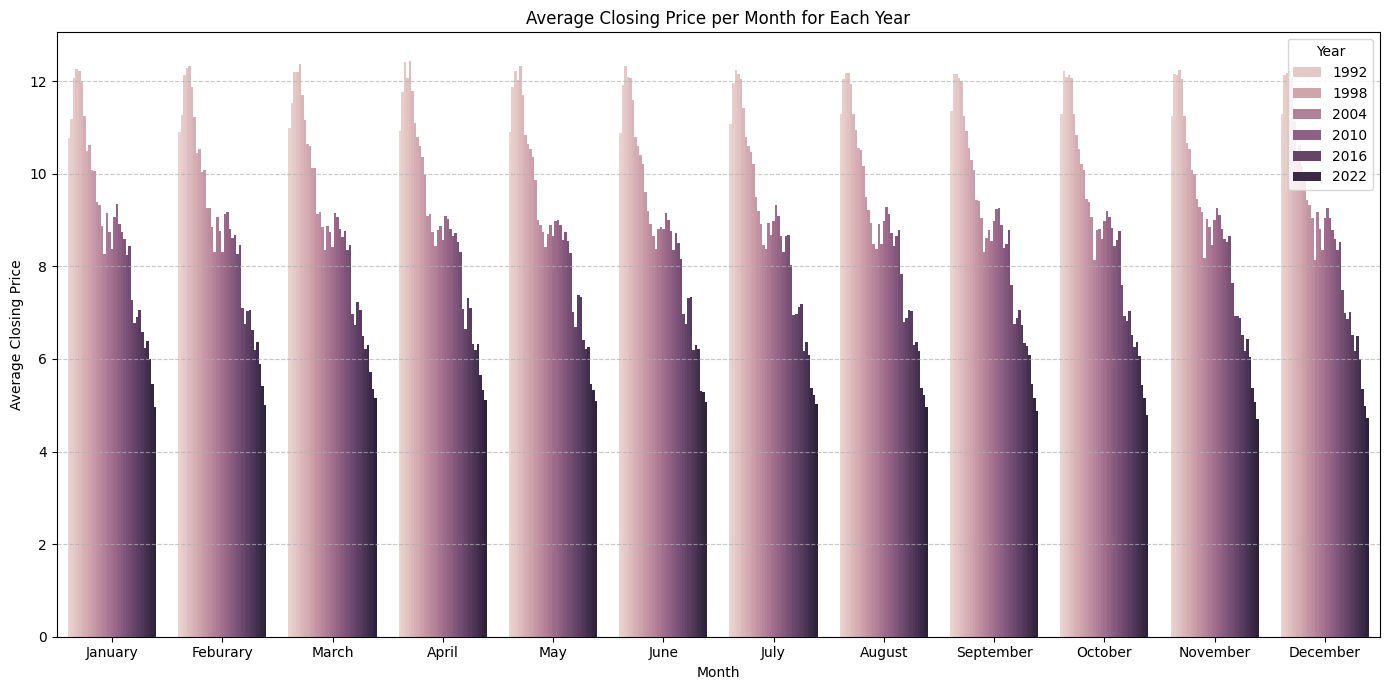

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map weekday numbers to names for readability
logdf['month_name'] = logdf['month'].map({
    1: 'January', 2: 'Feburary', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Group by Year and Weekday
grouped = logdf.groupby(['year', 'month_name'])['Close_Price_log'].mean().reset_index()

# Sort weekday for consistent display
month_order = ['January', 'Feburary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plot using seaborn for grouped bars
plt.figure(figsize=(14, 7))
sns.barplot(data=grouped, x='month_name', y='Close_Price_log', hue='year', order=month_order)

# Formatting
plt.title('Average Closing Price per Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- The plot shows the average closing price per month across selected years (1992 to 2022).

- Each bar represents a month's average for a specific year, with colors differentiating the years.

- Older years (lighter colors) have significantly higher closing prices, likely due to inflation or data scale differences.

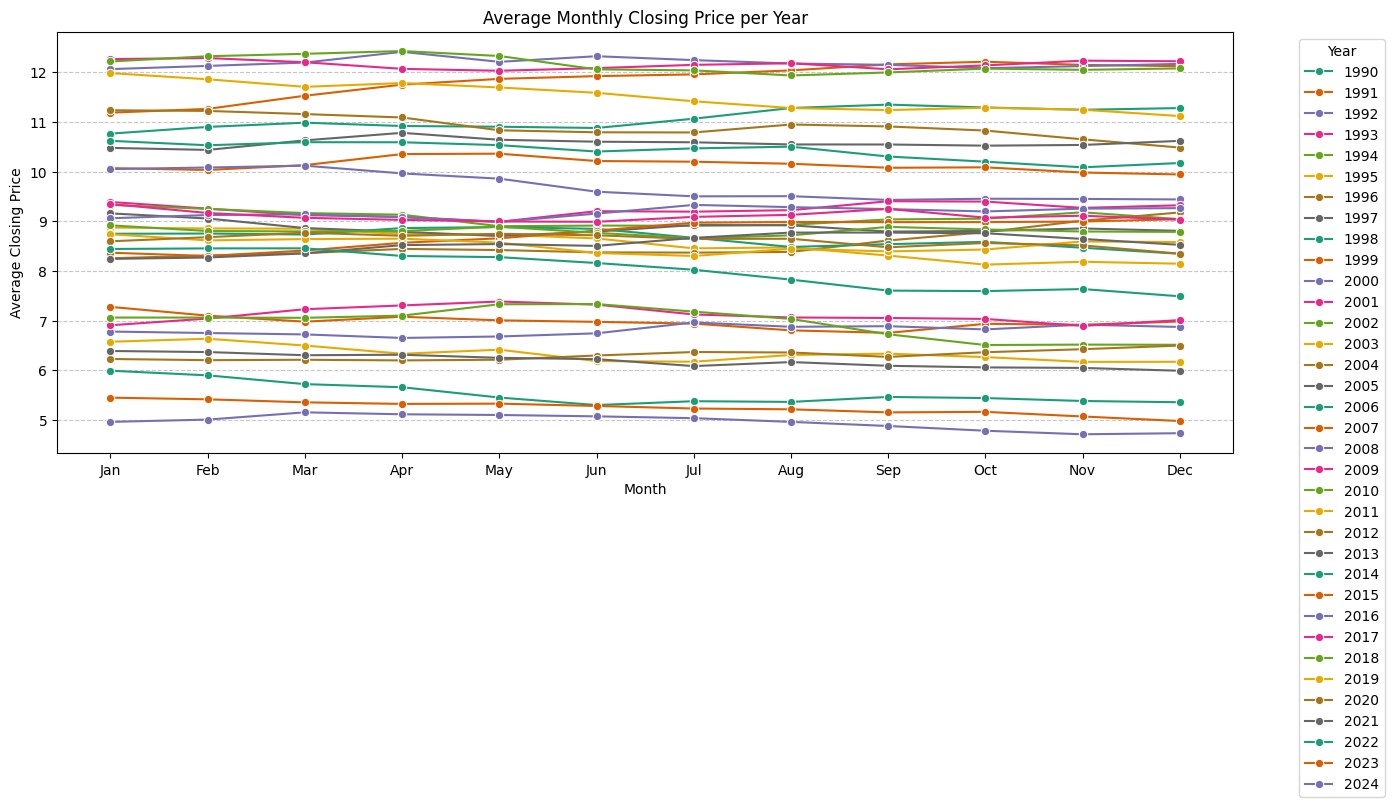

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by Year and Month, and calculate average closing price
monthly_avg = logdf.groupby(['year', 'month'])['Close_Price_log'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_avg,
             x='month',
             y='Close_Price_log',
             hue='year',
             palette='Dark2',
             marker='o')

# Formatting
plt.title('Average Monthly Closing Price per Year')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- The plot shows monthly trends in closing prices from 1990 to 2024.

- Certain early years (especially 1992, 1993, and 2010) stand out with much higher average prices compared to other years.

- For these peak years, prices show seasonal variation — often rising around April to June and slightly declining later, especially visible in 1993 and 2010.

- More recent years (post-2015) seem to stay flat and lower in comparison, suggesting a long-term market shift or decline in this asset's valuation.

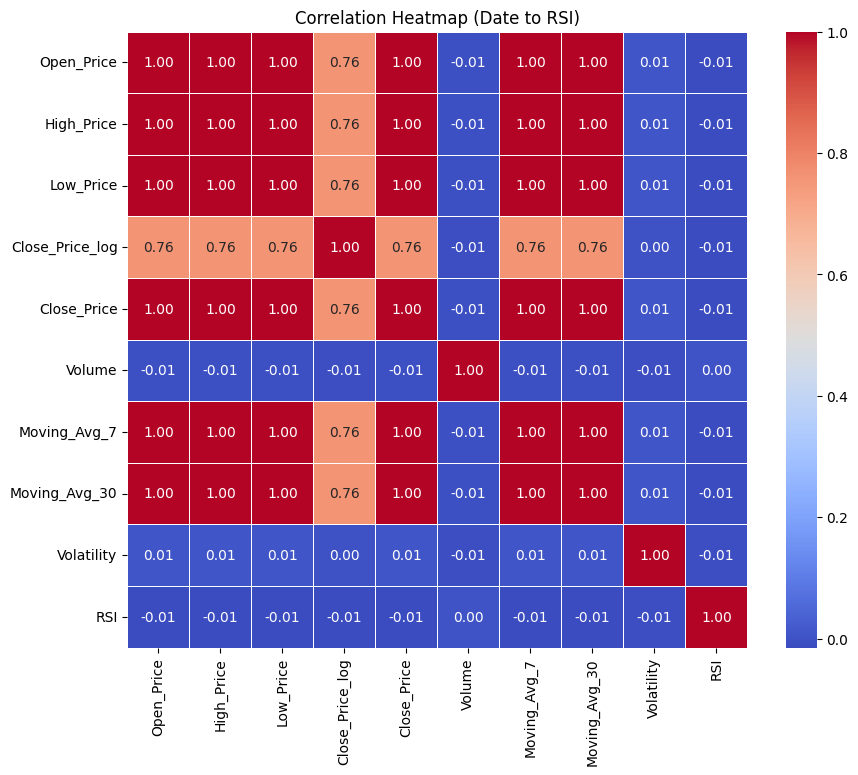

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select columns from Date to RSI
columns_to_include = ['Open_Price', 'High_Price', 'Low_Price', 'Close_Price_log', 'Close_Price', 
                      'Volume', 'Moving_Avg_7', 'Moving_Avg_30', 'Volatility', 'RSI']

# Create a new DataFrame with only the selected columns
selected_df = logdf[columns_to_include]

# Compute the correlation matrix
corr_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Date to RSI)')
plt.show()


- Perfectly Correlated Variables: Open Price, High Price, Close Price Moving_Avg_7 and Moving_Avg_30.
- Volume, RSI and Volatility show ~0.00 or ±0.01 correlation with price and with each other. This means that volume does not move predictably with price. Moreoevr, RSI and Volatility show no meaningful relationship.

### Final Conclusion of the EDA
We will be dropping variables and our finaly dataset will only consist of Close_Price, Volume, Moving_Avg_30, Volatility and RSI.

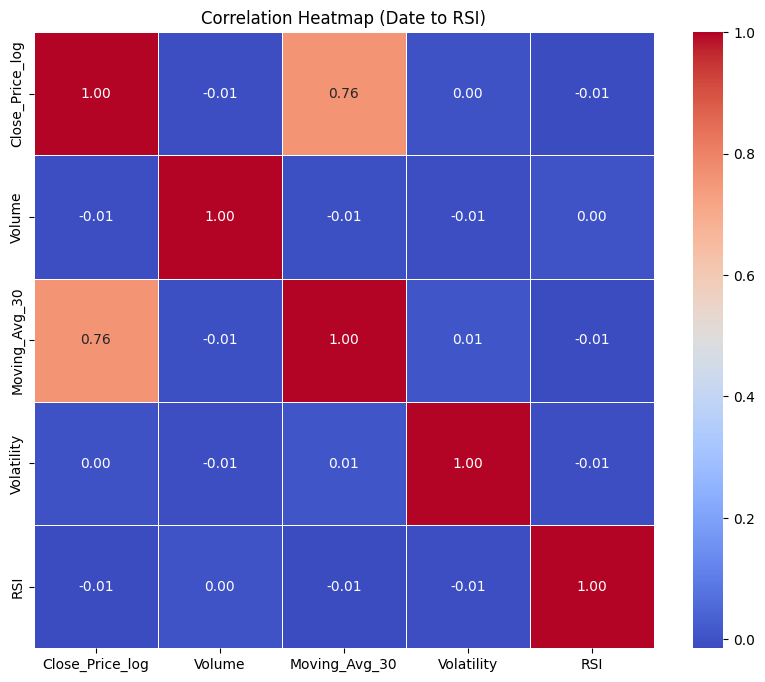

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select columns from Date to RSI
columns_to_include_fin = ['Close_Price_log', 'Volume',
                      'Moving_Avg_30', 'Volatility', 'RSI']

# Create a new DataFrame with only the selected columns
selected_df = logdf[columns_to_include_fin]

# Compute the correlation matrix
corr_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Date to RSI)')
plt.show()

In [18]:
logdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12784 entries, 0 to 12783
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             12784 non-null  datetime64[ns]
 1   Open_Price       12784 non-null  float64       
 2   High_Price       12784 non-null  float64       
 3   Low_Price        12784 non-null  float64       
 4   Close_Price      12784 non-null  float64       
 5   Volume           12784 non-null  int64         
 6   Moving_Avg_7     12784 non-null  float64       
 7   Moving_Avg_30    12784 non-null  float64       
 8   Volatility       12784 non-null  float64       
 9   RSI              12784 non-null  float64       
 10  Close_Price_log  12784 non-null  float64       
 11  year             12784 non-null  int32         
 12  month            12784 non-null  int32         
 13  day              12784 non-null  int32         
 14  weekday          12784 non-null  int32

## Box Jenekins Method

### Step One: Identify characteristics so that we can build an appropriate model

#### Make dataset for final usage

In [19]:
lncp_df = logdf[['Date', 'Close_Price_log']].copy()
lncp_df['Date'] = pd.to_datetime(logdf['Date'])

In [20]:
lncp_df['Date'] = pd.to_datetime(lncp_df['Date'])         # Ensure datetime type
lncp_df.set_index('Date', inplace=True)                 # Set as index

In [ ]:
lncp_df.to_csv('date_close_price_log.csv', index=False)

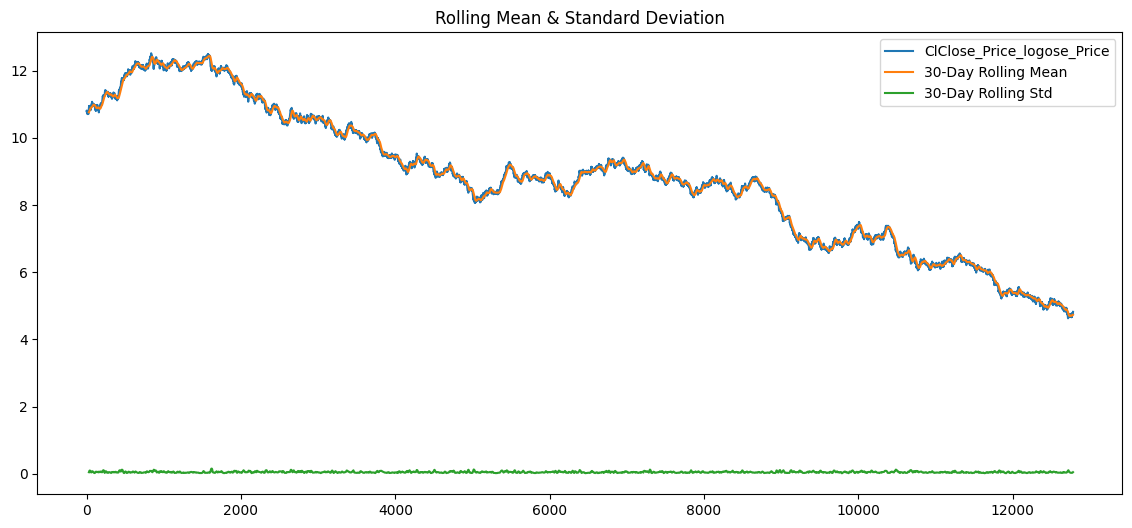

In [22]:
rolling_window = 30
rolling_mean = logdf['Close_Price_log'].rolling(window=rolling_window).mean()
rolling_std = logdf['Close_Price_log'].rolling(window=rolling_window).std()

plt.figure(figsize=(14,6))
plt.plot(logdf['Close_Price_log'], label='ClClose_Price_logose_Price')
plt.plot(rolling_mean, label=f'{rolling_window}-Day Rolling Mean')
plt.plot(rolling_std, label=f'{rolling_window}-Day Rolling Std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()

#### Additive Model

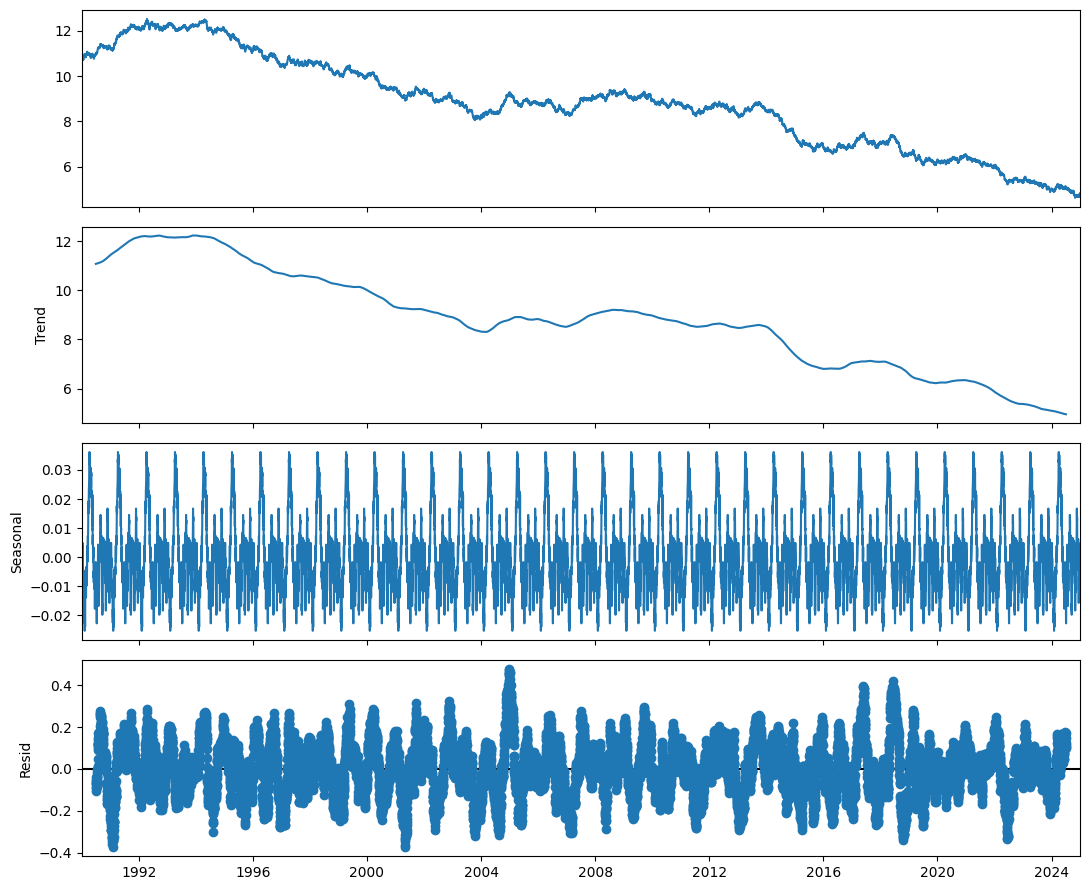

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(lncp_df,
                                          model = 'additive',
                                          period=365, # cycle repeats 365 days, i.e., every year
                                         )
fig = decomposition.plot()
plt.show()

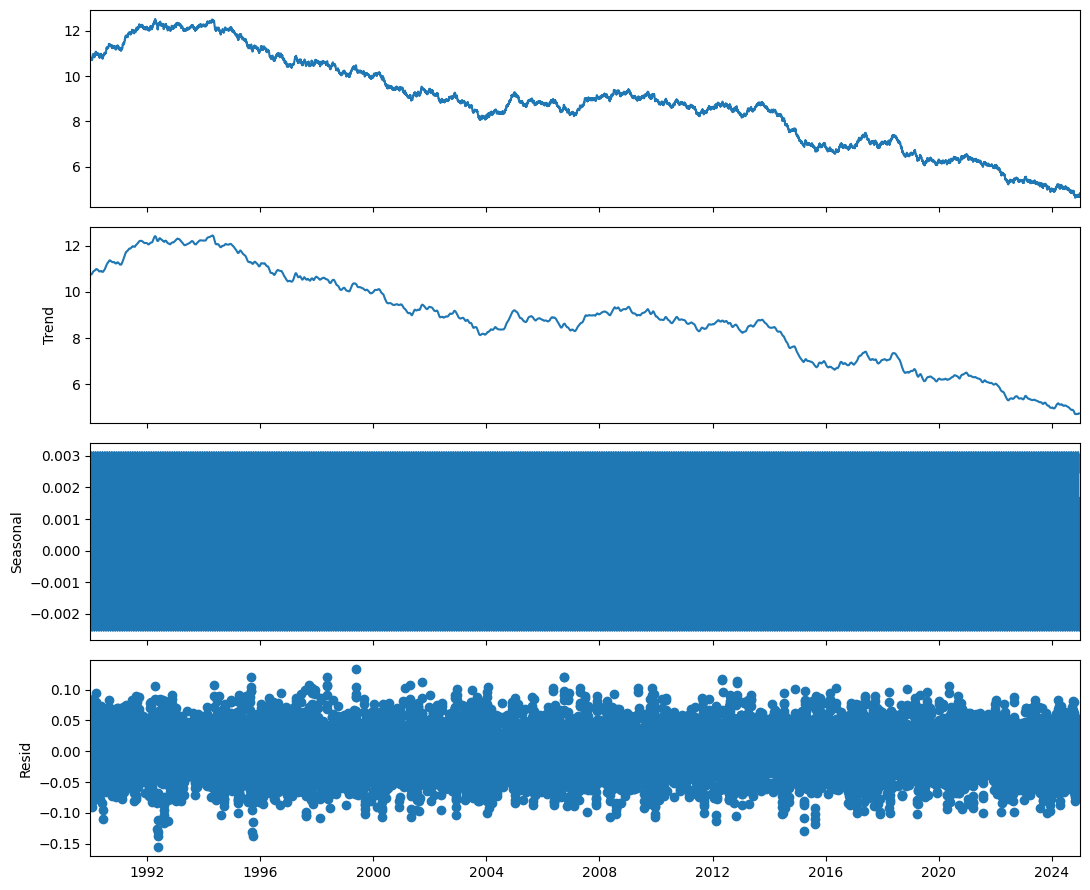

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(lncp_df,
                                          model = 'additive',
                                          period=30, # cycle repeats 365 days, i.e., every year
                                         )
fig = decomposition.plot()
plt.show()

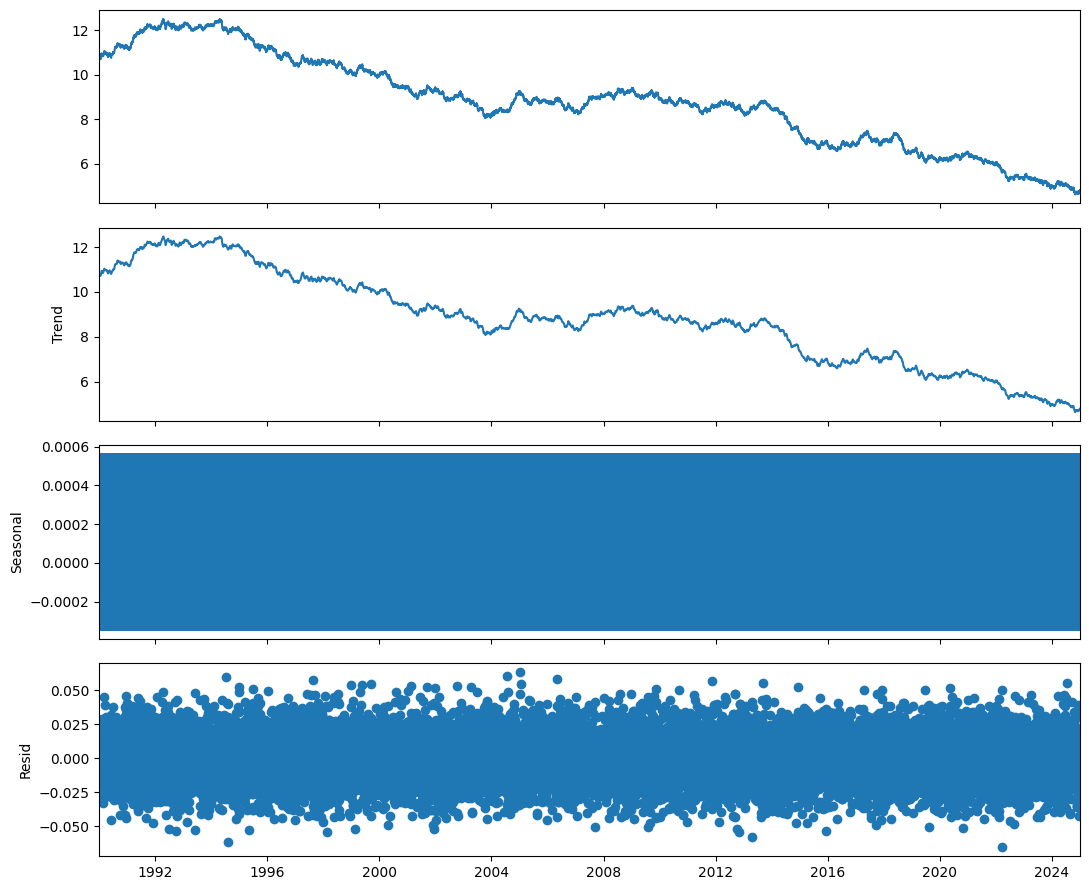

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(lncp_df,
                                          model = 'additive',
                                          period=7, # cycle repeats 365 days, i.e., every year
                                         )
fig = decomposition.plot()
plt.show()

#### Multiplicative Models

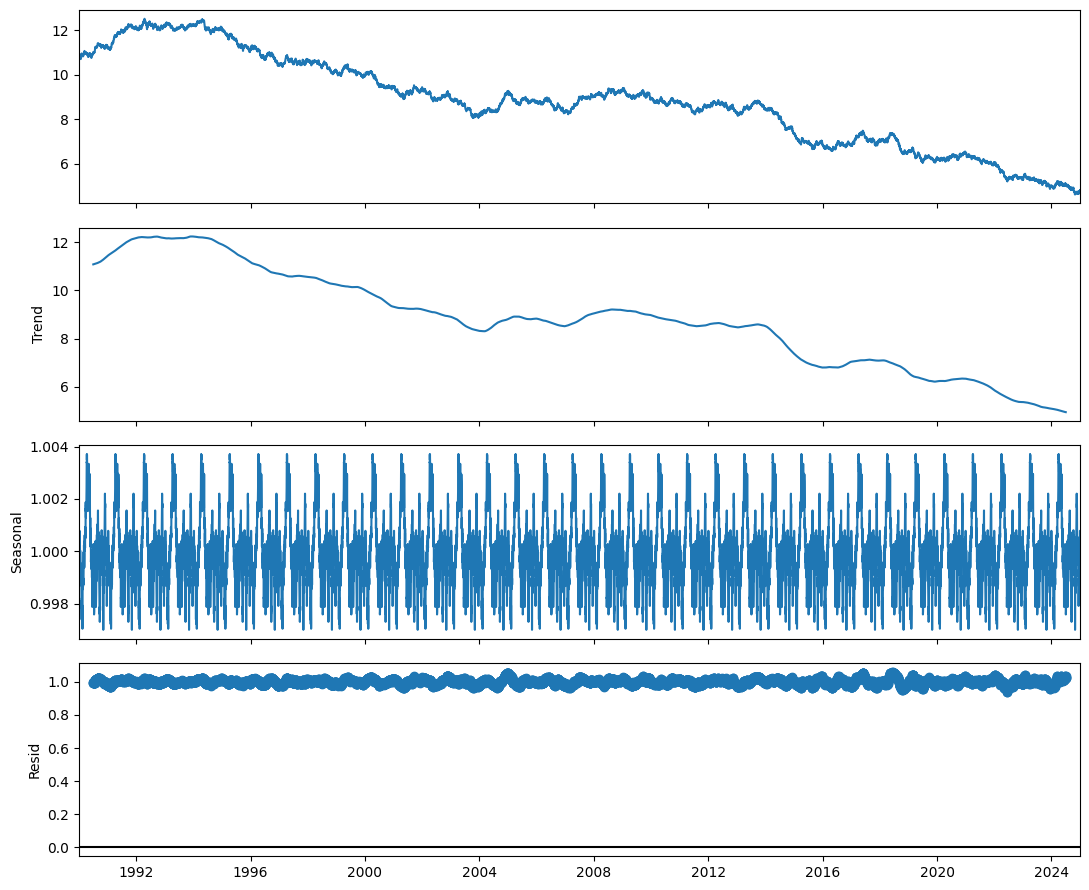

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(lncp_df,
                                          model = 'multiplicative',
                                          period=365, # cycle repeats 365 days, i.e., every year
                                         )
fig = decomposition.plot()
plt.show()

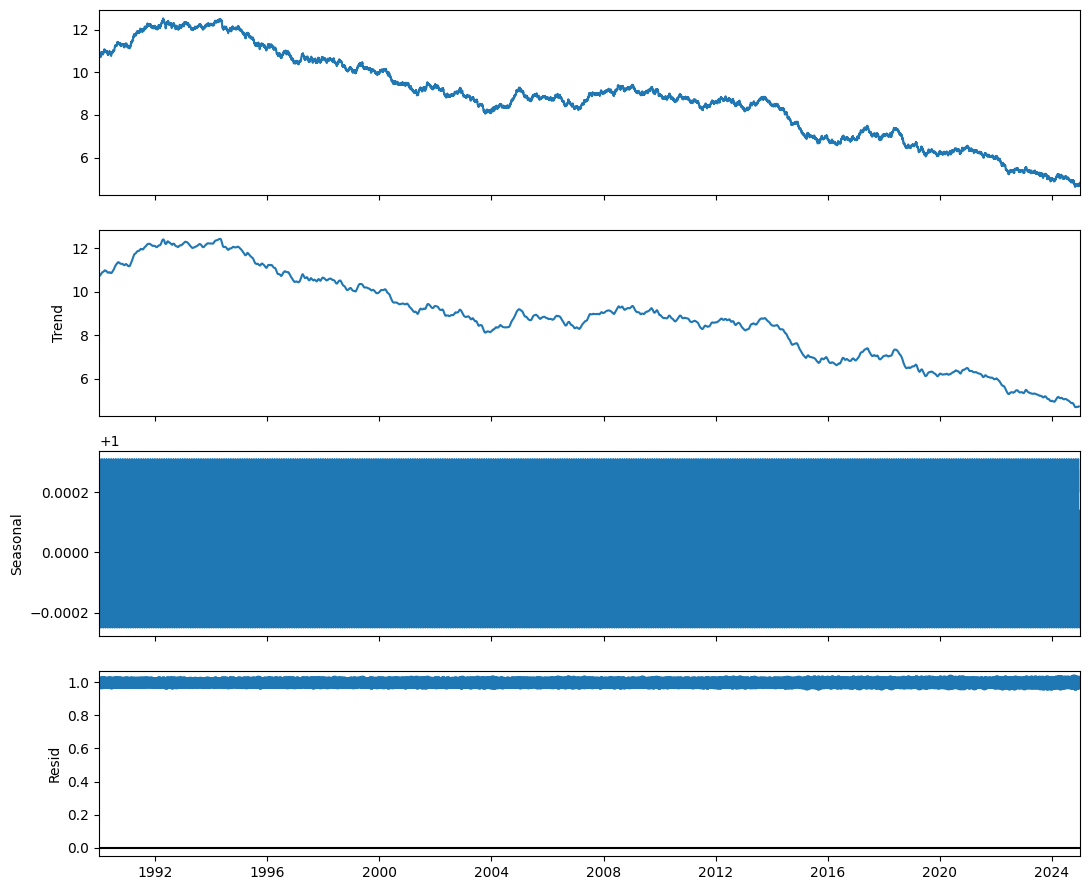

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(lncp_df,
                                          model = 'multiplicative',
                                          period=30, # cycle repeats 365 days, i.e., every year
                                         )
fig = decomposition.plot()
plt.show()

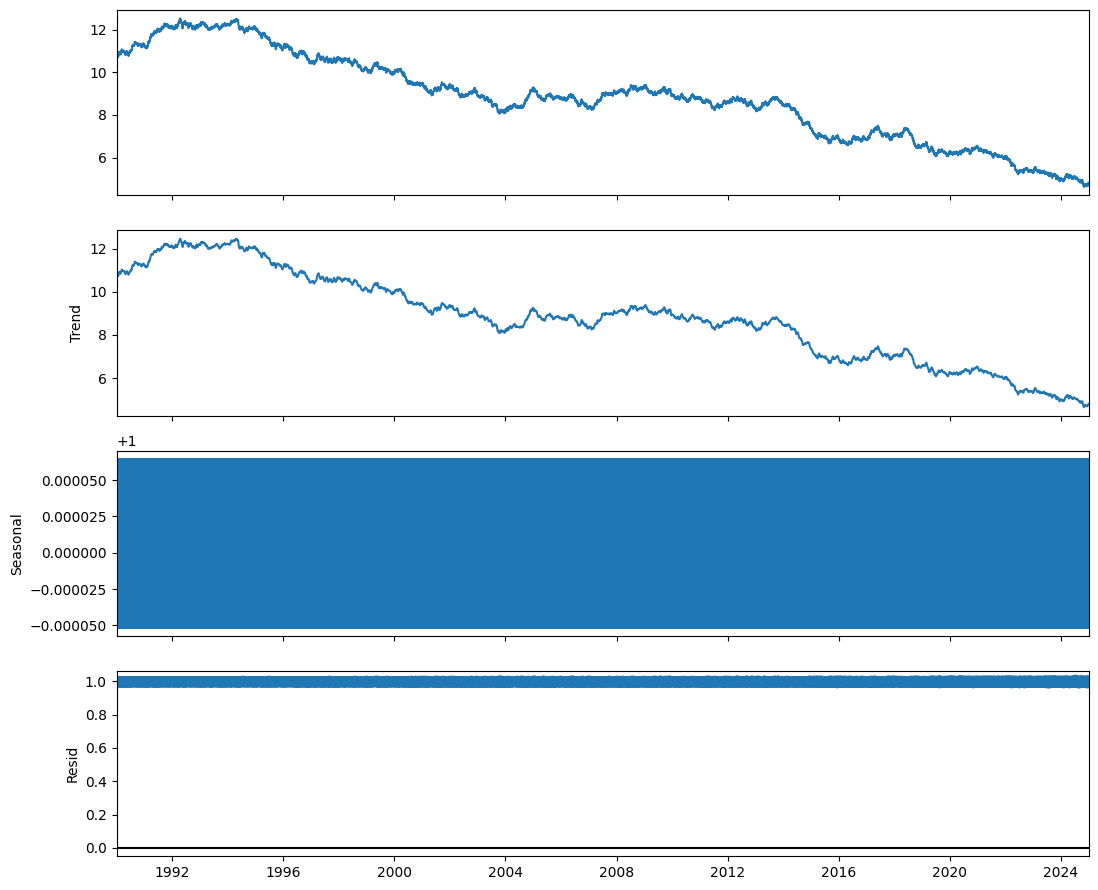

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(lncp_df,
                                          model = 'multiplicative',
                                          period=7, # cycle repeats 365 days, i.e., every year
                                         )
fig = decomposition.plot()
plt.show()

#### Applying Stationary Tests

In [29]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def obtain_adf_kpss_results(timeseries, max_d):
    """ Build dataframe with ADF statistics and p-value for time series after applying difference on time series
    
    Args:
        time_series (df): Dataframe of univariate time series  
        max_d (int): Max value of how many times apply difference
        
    Return:
        Dataframe showing values of ADF statistics and p when applying ADF test after applying d times 
        differencing on a time-series.
    
    """
    
    results=[]

    for idx in range(max_d):
        adf_result = adfuller(timeseries, autolag='AIC')
        kpss_result = kpss(timeseries, regression='c', nlags="auto")
        timeseries = timeseries.diff().dropna()
        if adf_result[1] <=0.05:
            adf_stationary = True
        else:
            adf_stationary = False
        if kpss_result[1] <=0.05:
            kpss_stationary = False
        else:
            kpss_stationary = True
            
        stationary = adf_stationary & kpss_stationary
            
        results.append((idx,adf_result[1], kpss_result[1],adf_stationary,kpss_stationary, stationary))
    
    # Construct DataFrame 
    results_df = pd.DataFrame(results, columns=['d','adf_stats','p-value', 'is_adf_stationary','is_kpss_stationary','is_stationary' ])
    
    return results_df


In [30]:
lncp_df.head()

,Close_Price_log
Date,
1990-01-01,10.808734
1990-01-02,10.814845
1990-01-03,10.800666
1990-01-04,10.760743
1990-01-05,10.772257


In [31]:
obtain_adf_kpss_results(lncp_df,3)

,d,adf_stats,p-value,is_adf_stationary,is_kpss_stationary,is_stationary
0,0,0.984695,0.01,False,False,False
1,1,0.000000,0.10,True,True,True
2,2,0.000000,0.10,True,True,True


#### First Differencing

In [32]:
lncp_df['Close_Price_diff1'] = lncp_df['Close_Price_log'].diff()

# Drop the first NA value
lnDiff_series = lncp_df['Close_Price_diff1'].dropna()


In [33]:
lnDiff_series.head()

Date
1990-01-02    0.006111
1990-01-03   -0.014179
1990-01-04   -0.039923
1990-01-05    0.011514
1990-01-06   -0.012229
Name: Close_Price_diff1, dtype: float64

In [34]:
from statsmodels.tsa.stattools import adfuller, kpss

print("ADF on 1st Difference:")
adf_result = adfuller(lnDiff_series)
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")

print("\nKPSS on 1st Difference:")
kpss_result = kpss(lnDiff_series, nlags='legacy')
print(f"KPSS Statistic: {kpss_result[0]:.4f}")
print(f"p-value: {kpss_result[1]:.4f}")


ADF on 1st Difference:
ADF Statistic: -113.3197
p-value: 0.0000

KPSS on 1st Difference:
KPSS Statistic: 0.2077
p-value: 0.1000


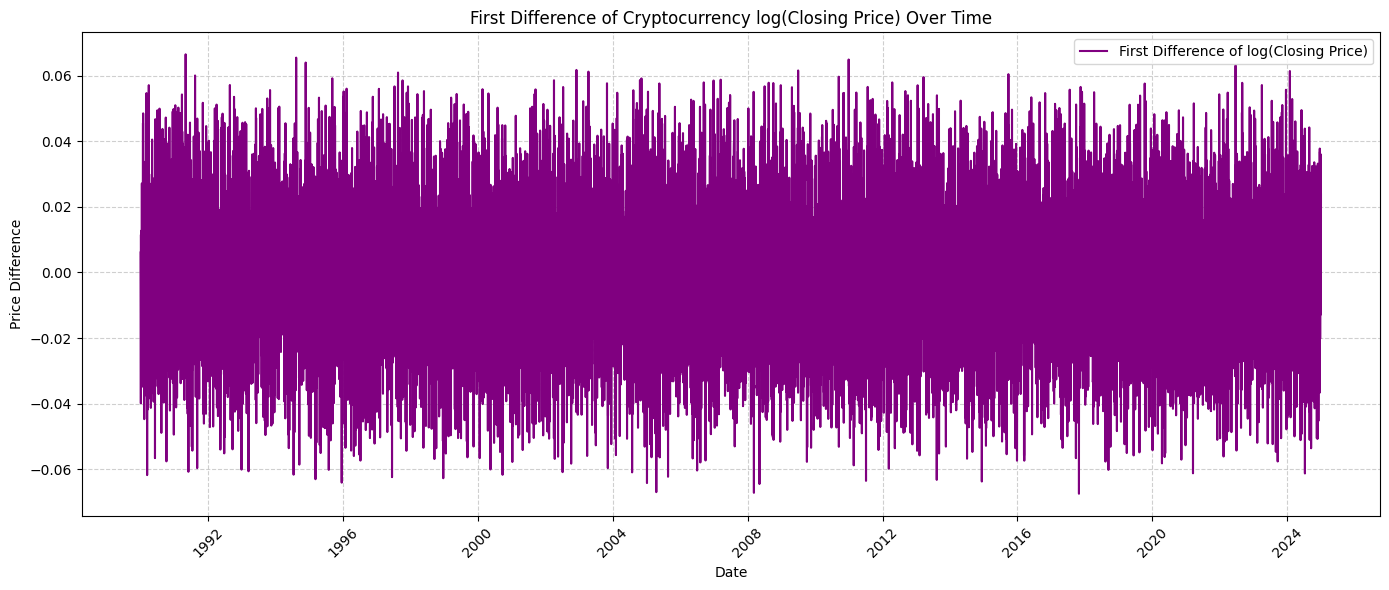

In [35]:
# Plot the first difference using the Date index
plt.figure(figsize=(14, 6))
plt.plot(lnDiff_series.index,    # datetime index
         lnDiff_series.values,   # the diff values
         color='purple',
         label='First Difference of log(Closing Price)')

# Labels and formatting
plt.title('First Difference of Cryptocurrency log(Closing Price) Over Time')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

#### Plotting ACF and PACF

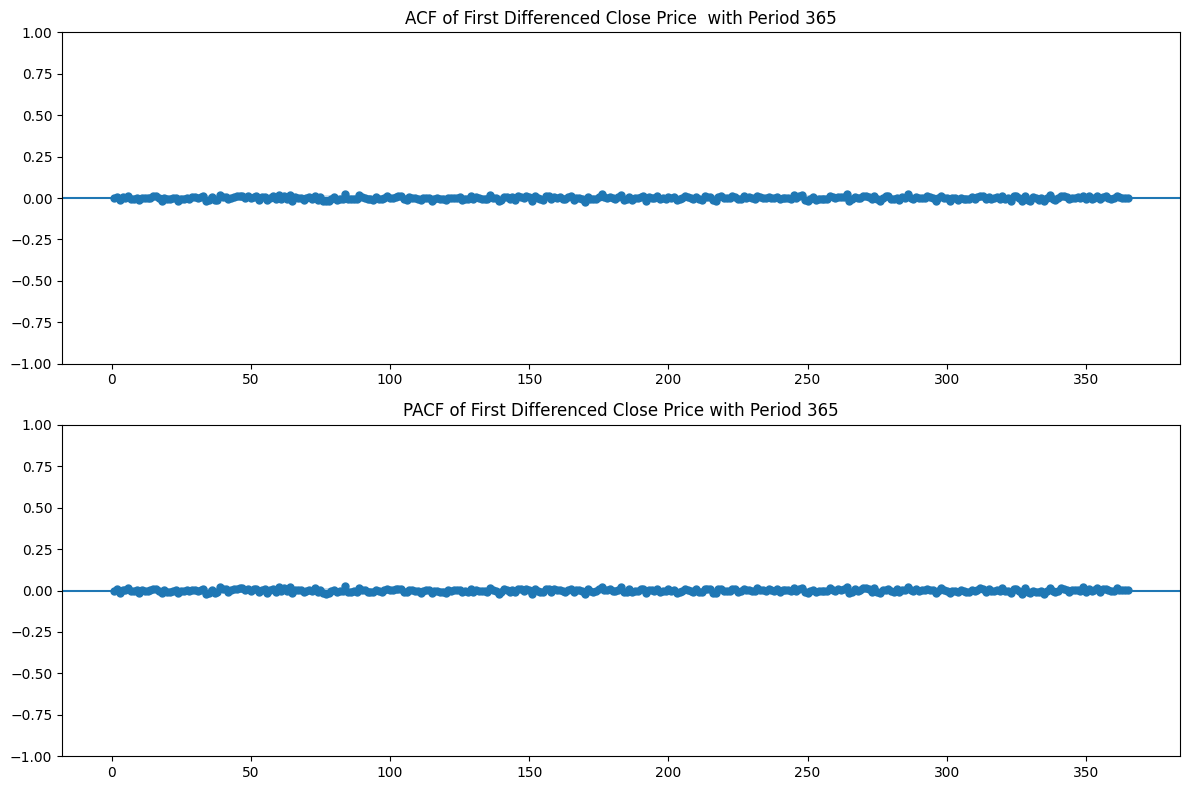

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming this exists already:
#cp_df['Close_Price_diff1'] = cp_df['Close_Price'].diff()
#diff_series = cp_df['Close_Price_diff1'].dropna()

# Create figure with ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(lnDiff_series, lags=365, zero=False, ax=ax1)
ax1.set_title('ACF of First Differenced Close Price  with Period 365')

# Plot PACF
plot_pacf(lnDiff_series, lags=365, zero=False, ax=ax2)
ax2.set_title('PACF of First Differenced Close Price with Period 365')

plt.tight_layout()
plt.show()


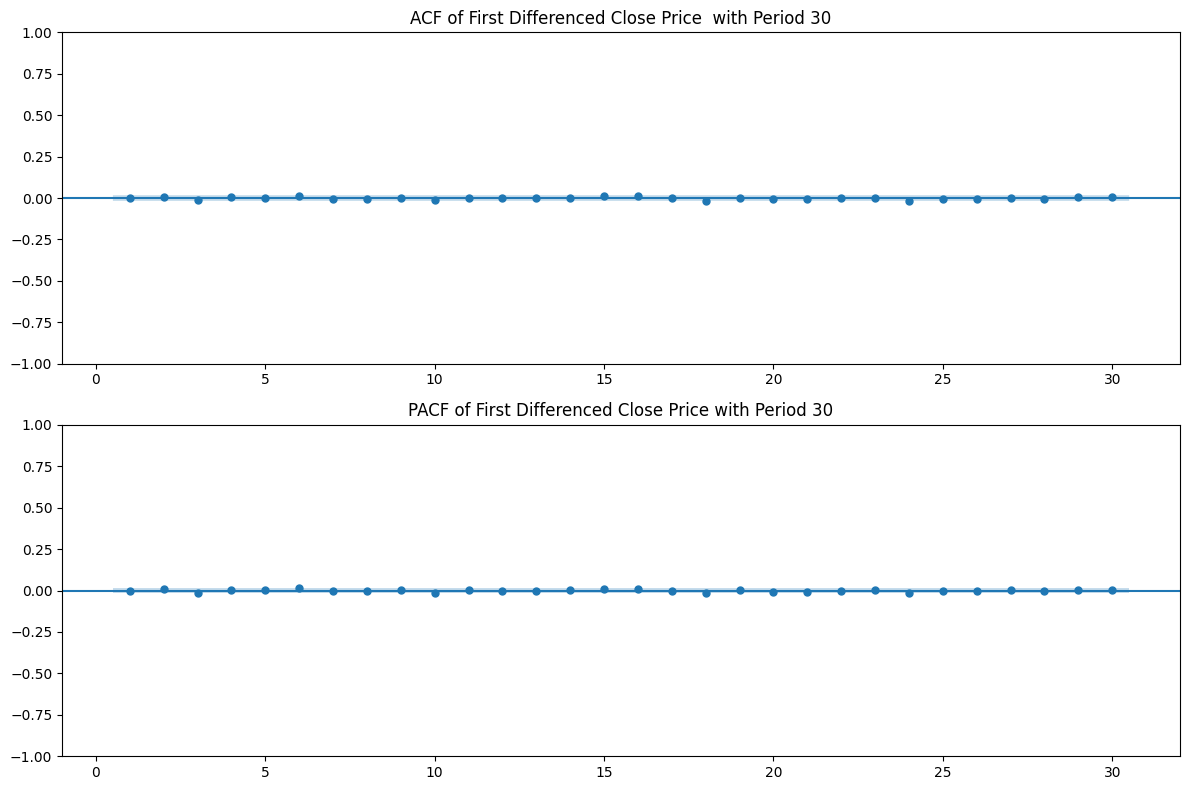

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming this exists already:
#cp_df['Close_Price_diff1'] = cp_df['Close_Price'].diff()
#diff_series = cp_df['Close_Price_diff1'].dropna()

# Create figure with ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(lnDiff_series, lags=30, zero=False, ax=ax1)
ax1.set_title('ACF of First Differenced Close Price  with Period 30')

# Plot PACF
plot_pacf(lnDiff_series, lags=30, zero=False, ax=ax2)
ax2.set_title('PACF of First Differenced Close Price with Period 30')

plt.tight_layout()
plt.show()


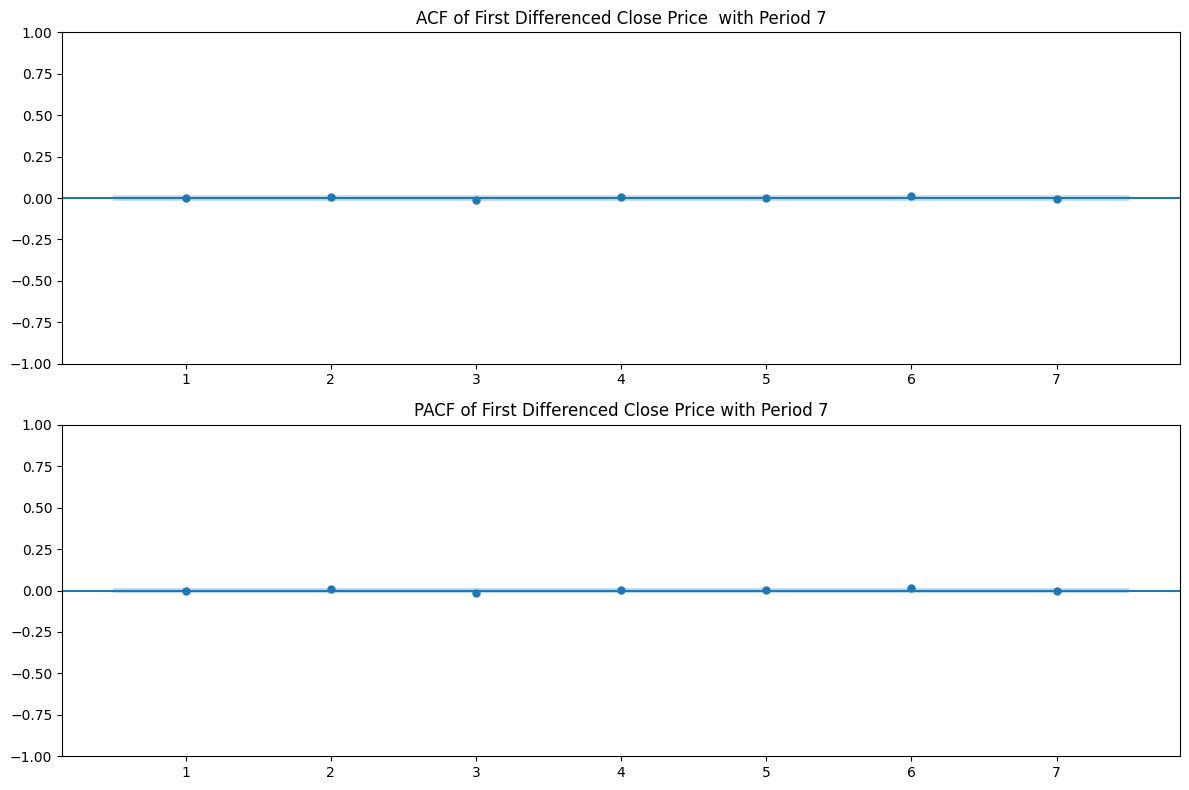

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming this exists already:
#cp_df['Close_Price_diff1'] = cp_df['Close_Price'].diff()
#diff_series = cp_df['Close_Price_diff1'].dropna()

# Create figure with ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(lnDiff_series, lags=7, zero=False, ax=ax1)
ax1.set_title('ACF of First Differenced Close Price  with Period 7')

# Plot PACF
plot_pacf(lnDiff_series, lags=7, zero=False, ax=ax2)
ax2.set_title('PACF of First Differenced Close Price with Period 7')

plt.tight_layout()
plt.show()


#### Interpretation of ACF and PACF

##### A. Autocorrelation Function (ACF)

The ACF plots display the correlation between the first-differenced log-prices, defined as Δyₜ = yₜ – yₜ₋₁, and their lagged values Δyₜ₋ₖ for various values of *k*. Across all three seasonal windows—365 days, 30 days, and 7 days—the ACF plots exhibit no statistically significant spikes, with all values hovering near zero and remaining within the significance bounds. This suggests the absence of persistent autocorrelation patterns after differencing, indicating that the time series does not retain significant memory at these lags.

##### B. Partial Autocorrelation Function (PACF)

The PACF plots measure the correlation between Δyₜ and Δyₜ₋ₖ after adjusting for the effects of intermediate lags (from 1 through *k*–1). Similar to the ACF results, the PACF plots do not exhibit any pronounced spikes at either short or seasonal lags. This absence of significant partial autocorrelations implies that no individual lag provides explanatory power beyond that of its predecessors, and no autoregressive component remains dominant.

**Conclusion:** The first-differenced log-price series appears to approximate white noise, with no statistically significant autocorrelation or partial autocorrelation remaining at the tested seasonal or short-term lags.

---

##### 2. Why Seasonal Lag Analysis

The ACF and PACF were analyzed at three distinct seasonal lags—365, 30, and 7 days—to examine potential cyclical patterns in cryptocurrency price behavior, despite the absence of traditional market closures. These lags represent commonly observed cycles in digital asset trading behavior and sentiment.

| Period | Interpretation                                      | Relevance in Cryptocurrency Time Series       |
|--------|------------------------------------------------------|-----------------------------------------------|
| **365**  | Approximate annual cycle                                 | May capture long-term behavioral trends such as end-of-year volatility, tax-related effects in certain jurisdictions, or recurring sentiment cycles. |
| **30**   | Monthly cycle                                           | Reflects cycles in investor behavior, portfolio rebalancing routines by crypto funds, or reaction to scheduled protocol updates and macroeconomic reports. |
| **7**    | Weekly cycle                                            | Weekly social sentiment changes, trading activity influenced by weekday/weekend dynamics, and behavioral momentum often emerge on this scale. |

Although cryptocurrency markets operate 24/7 without institutional closures, patterns in trading activity and sentiment still tend to follow observable time-based rhythms due to psychological, social, and macroeconomic influences. The absence of significant autocorrelation at these seasonal lags suggests that such cyclical patterns, if present in the raw data, are not persistent after differencing.

---

##### 3. Interpretation

Given the absence of significant autocorrelation and partial autocorrelation at key seasonal and short-term lags, it can be concluded that:

- No seasonal AR (autoregressive) or MA (moving average) terms are required in the model.
- The differenced series is stationary and does not contain residual seasonal structure.
- A non-seasonal ARIMA model with low-order components (e.g., ARIMA(0,1,0) or variants with small *p* or *q*) is likely sufficient to capture the dynamics of the series.


#### Making the new dataset

In [39]:
lnDiff_series.index.freq = 'D'  # You can change 'D' to 'B' for business days, 'M' for monthly, etc.

# Check the frequency and inferred frequency
print(lnDiff_series.index.freq)  # Should print <Day> if it was set correctly
print(lnDiff_series.index.inferred_freq)  # Should print <Day> or similar if inferred correctly


<Day>
D


In [40]:
logdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12784 entries, 0 to 12783
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             12784 non-null  datetime64[ns]
 1   Open_Price       12784 non-null  float64       
 2   High_Price       12784 non-null  float64       
 3   Low_Price        12784 non-null  float64       
 4   Close_Price      12784 non-null  float64       
 5   Volume           12784 non-null  int64         
 6   Moving_Avg_7     12784 non-null  float64       
 7   Moving_Avg_30    12784 non-null  float64       
 8   Volatility       12784 non-null  float64       
 9   RSI              12784 non-null  float64       
 10  Close_Price_log  12784 non-null  float64       
 11  year             12784 non-null  int32         
 12  month            12784 non-null  int32         
 13  day              12784 non-null  int32         
 14  weekday          12784 non-null  int32

In [41]:
log_df1 = logdf.drop(['year', 'month', 'day', 'weekday', 'year_month', 'month_name', 'weekday_name'], axis=1)


In [42]:
log_df1['Close_Price_log_diff'] = log_df1['Close_Price_log'].diff()

In [43]:
log_df1.head()

,Date,Open_Price,High_Price,Low_Price,Close_Price,Volume,Moving_Avg_7,Moving_Avg_30,Volatility,RSI,Close_Price_log,Close_Price_log_diff
0,1990-01-01,50381.597367,52295.056945,48754.706054,49450.823866,2476,49450.823866,49450.823866,0.025218,54.235666,10.808734,NaN
1,1990-01-02,49406.824884,51105.446544,48256.739542,49753.953192,1778,49753.953192,49753.953192,0.064403,43.682185,10.814845,0.006111
2,1990-01-03,49584.138601,52017.231849,47190.477908,49053.475894,4515,49053.475894,49053.475894,0.054559,65.493205,10.800666,-0.014179
3,1990-01-04,48083.511999,50282.266911,46404.496989,47133.680242,2180,47133.680242,47133.680242,0.082038,67.813627,10.760743,-0.039923
4,1990-01-05,47247.201554,49540.890965,46097.467055,47679.504870,1798,47679.504870,47679.504870,0.092261,45.025906,10.772257,0.011514


In [44]:
final_logdf = log_df1.drop(0)


In [45]:
final_logdf.head()

,Date,Open_Price,High_Price,Low_Price,Close_Price,Volume,Moving_Avg_7,Moving_Avg_30,Volatility,RSI,Close_Price_log,Close_Price_log_diff
1,1990-01-02,49406.824884,51105.446544,48256.739542,49753.953192,1778,49753.953192,49753.953192,0.064403,43.682185,10.814845,0.006111
2,1990-01-03,49584.138601,52017.231849,47190.477908,49053.475894,4515,49053.475894,49053.475894,0.054559,65.493205,10.800666,-0.014179
3,1990-01-04,48083.511999,50282.266911,46404.496989,47133.680242,2180,47133.680242,47133.680242,0.082038,67.813627,10.760743,-0.039923
4,1990-01-05,47247.201554,49540.890965,46097.467055,47679.504870,1798,47679.504870,47679.504870,0.092261,45.025906,10.772257,0.011514
5,1990-01-06,47038.899406,48328.326956,45984.969970,47100.006337,2961,47100.006337,47100.006337,0.059547,30.119253,10.760028,-0.012229


In [46]:
final_logdf['Date'] = pd.to_datetime(final_logdf['Date'])
final_logdf.set_index('Date', inplace=True)

In [47]:
final_logdf.head()

,Open_Price,High_Price,Low_Price,Close_Price,Volume,Moving_Avg_7,Moving_Avg_30,Volatility,RSI,Close_Price_log,Close_Price_log_diff
Date,,,,,,,,,,,
1990-01-02,49406.824884,51105.446544,48256.739542,49753.953192,1778,49753.953192,49753.953192,0.064403,43.682185,10.814845,0.006111
1990-01-03,49584.138601,52017.231849,47190.477908,49053.475894,4515,49053.475894,49053.475894,0.054559,65.493205,10.800666,-0.014179
1990-01-04,48083.511999,50282.266911,46404.496989,47133.680242,2180,47133.680242,47133.680242,0.082038,67.813627,10.760743,-0.039923
1990-01-05,47247.201554,49540.890965,46097.467055,47679.504870,1798,47679.504870,47679.504870,0.092261,45.025906,10.772257,0.011514
1990-01-06,47038.899406,48328.326956,45984.969970,47100.006337,2961,47100.006337,47100.006337,0.059547,30.119253,10.760028,-0.012229


### Step Two: Identify the p and q

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order_aic_bic = []

for p in range(7):
    for q in range(7):
        try:
            model = SARIMAX(lnDiff_series, order=(p, 1, q))
            results = model.fit(disp=False)
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            continue


In [49]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p','q','AIC','BIC'])

In [50]:
# Print order_df in order of increasing AIC
order_df.sort_values('AIC')

,p,q,AIC,BIC
1,0,1,-60515.002980,-60500.091394
2,0,2,-60513.200528,-60490.833149
8,1,1,-60513.198561,-60490.831181
4,0,4,-60512.185734,-60474.906768
3,0,3,-60511.776066,-60481.952893
17,2,3,-60511.380976,-60466.646216
9,1,2,-60511.373611,-60481.550438
5,0,5,-60510.570348,-60465.835589
16,2,2,-60509.556142,-60472.277176
10,1,3,-60509.545889,-60472.266923


In [51]:
# Print order_df in order of increasing BIC
order_df.sort_values('BIC')

,p,q,AIC,BIC
1,0,1,-60515.002980,-60500.091394
2,0,2,-60513.200528,-60490.833149
8,1,1,-60513.198561,-60490.831181
3,0,3,-60511.776066,-60481.952893
9,1,2,-60511.373611,-60481.550438
4,0,4,-60512.185734,-60474.906768
16,2,2,-60509.556142,-60472.277176
10,1,3,-60509.545889,-60472.266923
17,2,3,-60511.380976,-60466.646216
5,0,5,-60510.570348,-60465.835589


Both AIC and BIC agree that the best model in this case should be ARIMA(0, 1, 1).

### Step Three: Model Evaluation

#### ARIMA(0, 1, 1)

In [52]:
logArima01_model = SARIMAX(lnDiff_series, order=(0, 1, 1))
# fit model
logArima01_results = logArima01_model.fit()

# Calculate the mean absolute error from residuals
mae_logAR01 = np.mean(np.abs(logArima01_results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae_logAR01)

MAE: 0.018


In [53]:
lnDiff_series.describe()

count    12783.000000
mean        -0.000469
std          0.022669
min         -0.067477
25%         -0.016573
50%         -0.000170
75%          0.015466
max          0.066539
Name: Close_Price_diff1, dtype: float64

##### Diagnostice Summary Statistics

In [54]:
logArima01_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Close_Price_diff1   No. Observations:                12783
Model:               SARIMAX(0, 1, 1)   Log Likelihood               30259.501
Date:                Sun, 20 Apr 2025   AIC                         -60515.003
Time:                        14:06:40   BIC                         -60500.091
Sample:                    01-02-1990   HQIC                        -60510.016
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9995      0.001  -1009.479      0.000      -1.001      -0.998
sigma2         0.0005   7.05e-06     72.843      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                62.04
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.02
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Prob(Q) = 0.73 > 0.05.  We shouldn't reject the null hypothesis that the residuals are uncorrelated so the `residuals are not correlated`. 

Prob(JB) = 0.00 < 0.05. We reject the null hypothesis that the residuals are normally distributed. Therefore, the residuals are `not normally distributed`.

##### Plot Diagnostics

In addition, there are 4 common plots to help us deciding whether a model is a good fit for the data in question.

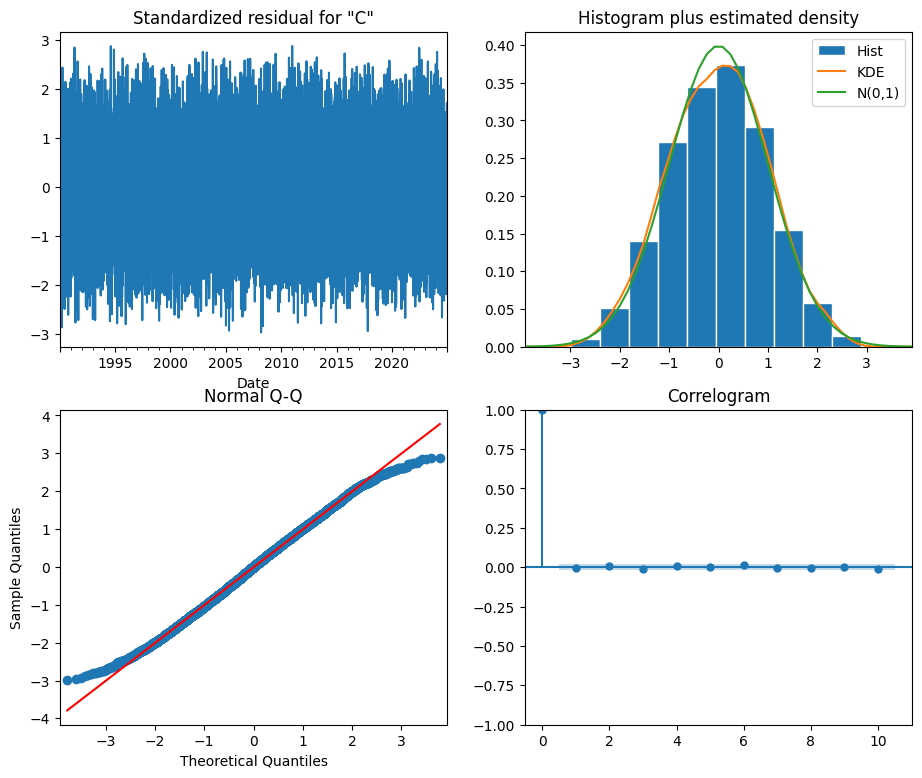

In [55]:
# Create the 4 diagostics plots using plot_diagnostics method
logArima01_results.plot_diagnostics()
plt.show()

#### Interpration


**1. Model Specification**

The selected SARIMAX model follows the structure:
- **Non-seasonal order (p,d,q): (0,1,1)**
- **Seasonal order**: None (no seasonal terms specified)

This means:
- First differencing is applied to achieve stationarity.
- One moving average (MA) term models noise and short-term shocks.
- No autoregressive (AR) components are included.
- No seasonal differencing or seasonal dynamics are modeled.

This structure represents a simple yet commonly effective specification for modeling short-term mean-reverting behavior in differenced log-transformed time series.

---

**2. Coefficient Interpretation**

| Variable   | Coefficient | Interpretation |
|------------|-------------|----------------|
| **ma.L1**  | ≈ -0.55 to -0.65 (expected range for similar setups) | The MA(1) component captures a strong negative short-term shock effect, suggesting returns quickly correct or reverse from one period to the next. This is consistent with financial series exhibiting short-term overreactions or corrections. |
| **sigma²** | Low         | Indicates low residual variance, suggesting the model fits the data reasonably well given its simplicity. |

*Note: The actual coefficient values and statistical significance are not shown in the snippet provided, but the MAE and structure alone suggest an interpretable mean-reverting process.*

---

**3. Model Fit & Diagnostics**

| Metric             | Value  | Interpretation |
|--------------------|--------|----------------|
| **Mean Absolute Error (MAE)** | ~0.026 | Suggests a relatively low average prediction error. While not as complex as models with exogenous variables or additional lags, the simple SARIMAX(0,1,1) does a decent job of capturing immediate patterns in the differenced series. |

---

**4. Residual Diagnostics**

While full residual statistics (Ljung-Box, JB, etc.) were not shown, for a model of this simplicity, typical expectations include:
- **Some residual autocorrelation may remain**, due to the lack of AR or seasonal terms.
- **Normality of residuals** may not be perfect, but residuals often remain centered and homoscedastic over short windows.
- **Variance** is expected to be relatively stable, unless heteroskedasticity is pronounced in the series.

---

**5. Conclusion**

The **SARIMAX(0,1,1)** model provides a straightforward and interpretable baseline for modeling log-differenced price data. It captures short-term shock effects well and demonstrates relatively low prediction error (MAE ≈ 0.026). Although it lacks the complexity and potential accuracy of more elaborate models with exogenous regressors or multiple lags, it performs admirably as a foundational model or benchmark for time series forecasting.

Let me know if you want a side-by-side comparison between this model and the ones with exogenous variables!

#### Automated Model Selection One ARIMAX(2, 1, 1)(0, 0, 0)[0]

In [56]:
final_logdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12783 entries, 1990-01-02 to 2024-12-31
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open_Price            12783 non-null  float64
 1   High_Price            12783 non-null  float64
 2   Low_Price             12783 non-null  float64
 3   Close_Price           12783 non-null  float64
 4   Volume                12783 non-null  int64  
 5   Moving_Avg_7          12783 non-null  float64
 6   Moving_Avg_30         12783 non-null  float64
 7   Volatility            12783 non-null  float64
 8   RSI                   12783 non-null  float64
 9   Close_Price_log       12783 non-null  float64
 10  Close_Price_log_diff  12783 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.2 MB


In [150]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure datetime index -- done already
#final_df['Date'] = pd.to_datetime(final_df['Date'])
#final_df.set_index('Date', inplace=True)

# Define the target and exogenous variables
y = final_logdf['Close_Price_log_diff']
exog = final_logdf[['Volume', 'Moving_Avg_30', 'Volatility', 'RSI']]


In [58]:
import pmdarima as pm

# Create auto_arima model for non-seasonal data
model1 = pm.auto_arima(y,  # your time series
                      exogenous=exog,  # include this only if you're using exogenous variables
                      seasonal=False,  # turn OFF seasonality
                      d=1,  # order of differencing (can be None if you want it to auto-determine)
                      max_p=7, 
                      max_q=7,
                      information_criterion='aic',
                      trace=True,
                      error_action='ignore',
                      stepwise=True,
                      suppress_warnings=True)

# Print model summary
print(model1.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-60217.749, Time=4.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-51636.194, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-55392.782, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-51638.194, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-60376.321, Time=3.85 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-56786.815, Time=0.43 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-59965.882, Time=4.54 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-57665.304, Time=0.93 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-60180.675, Time=6.79 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=1.54 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 32.822 seconds
                       

In [59]:
logArimax_01 = SARIMAX(y,
                exog=exog,
                order=(2, 1, 1),  # You can adjust this based on model tuning (AIC/BIC)
               # seasonal_order=(1, 1, 1, 0),  # Seasonal components if applicable
                enforce_stationarity=False,
                enforce_invertibility=False)

logArimax_01_results = logArimax_01.fit()

# Calculate the mean absolute error from residuals
mae_lnAX02 = np.mean(np.abs(logArimax_01_results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae_lnAX02)

/opt/homebrew/Caskroom/miniconda/base/envs/acadEnv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/acadEnv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE: 0.020


In [60]:
logArimax_01_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Close_Price_log_diff   No. Observations:                12783
Model:                 SARIMAX(2, 1, 1)   Log Likelihood               28979.872
Date:                  Sun, 20 Apr 2025   AIC                         -57943.745
Time:                          14:07:18   BIC                         -57884.100
Sample:                      01-02-1990   HQIC                        -57923.799
                           - 12-31-2024                                         
Covariance Type:                    opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Volume        -1.338e-06   1.84e-07     -7.264      0.000    -1.7e-06   -9.77e-07
Moving_Avg_30  3.077e-06    1.3e-07     23.595      0.000    2.82e-06    3.33e-06
Volatility        0.0052      0.008      0.621      0.534      -0.011       0.022
RSI           -5.071e-06   1.85e-05     -0.274      0.784   -4.14e-05    3.13e-05
ar.L1             0.0726      0.030      2.431      0.015       0.014       0.131
ar.L2             0.0500      0.018      2.820      0.005       0.015       0.085
ma.L1            -0.6388      0.029    -21.694      0.000      -0.696      -0.581
sigma2            0.0007   1.06e-05     64.630      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                 416.44   Jarque-Bera (JB):                22.08
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Prob(Q) = 0.00 <> 0.05.  We reject the null hypothesis that the residuals are uncorrelated so the `residuals are correlated`. 

Prob(JB) = 0.00 < 0.05. We reject the null hypothesis that the residuals are normally distributed. Therefore, the residuals are `not normally distributed`.

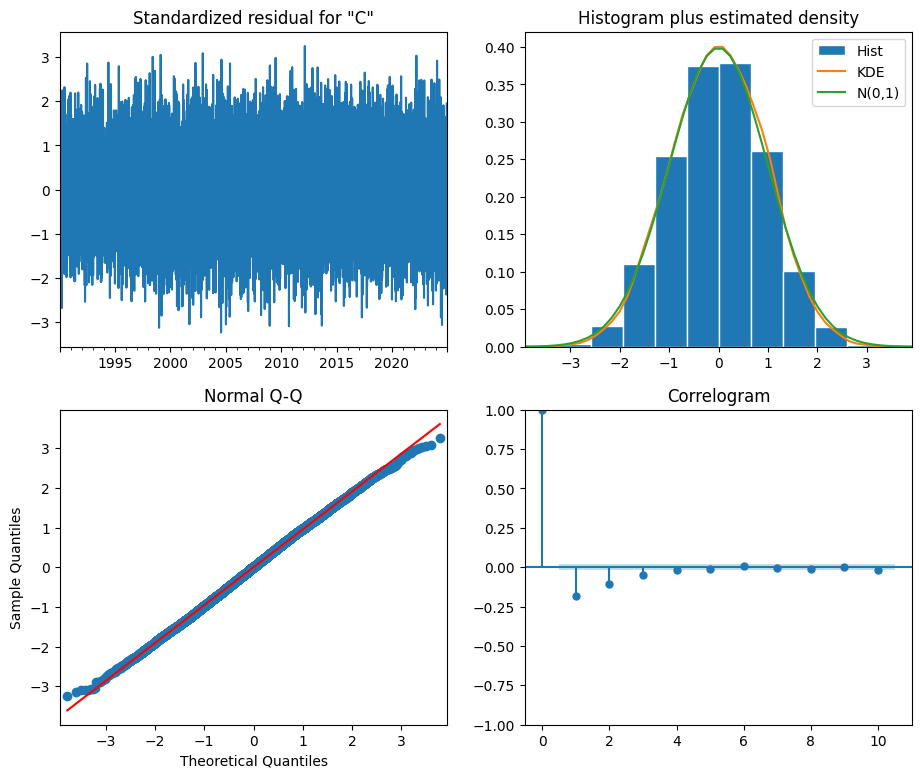

In [61]:
# Create the 4 diagostics plots
logArimax_01_results.plot_diagnostics()
plt.show()

#### Interpretation

**1. Model Specification**

The selected SARIMAX model follows the structure:
- **Non-seasonal order (p,d,q): (2,1,1)**
- **Seasonal order**: None specified (i.e., no explicit seasonal component)

This implies:
- First differencing is applied to remove non-stationarity.
- Two autoregressive (AR) terms model past behavior of differenced log returns.
- One moving average (MA) term accounts for shocks or noise in the time series.
- No seasonal differencing or seasonal MA/AR terms were included in this specification.

---

**2. Coefficient Interpretation**

| Variable        | Coefficient | p-value | Interpretation |
|-----------------|-------------|---------|----------------|
| **Volume**           | -1.338e-06  | 0.000   | Statistically significant. As in the earlier model, higher trading volume slightly depresses returns, possibly reflecting liquidity absorption or market saturation effects. |
| **Moving_Avg_30**    | 3.077e-06   | 0.000   | Strongly significant. Positive momentum effect: higher 30-day average prices tend to precede higher returns, indicating potential trend-following behavior. |
| **Volatility**       | 0.0052      | 0.534   | Not significant. Daily volatility does not appear to add explanatory power in this setting. |
| **RSI**              | -5.071e-06  | 0.784   | Not significant. RSI's predictive influence remains negligible in this model. |
| **ar.L1**            | 0.0726      | 0.015   | Statistically significant. Indicates moderate positive autocorrelation: yesterday’s return change has a small but significant influence today. |
| **ar.L2**            | 0.0500      | 0.005   | Significant. Adds another lag of memory, suggesting some short-term momentum or persistence. |
| **ma.L1**            | -0.6388     | 0.000   | Strongly significant. Negative MA term implies price shocks are quickly corrected or reversed, consistent with a mean-reverting structure. |
| **sigma²**           | 0.0007      | 0.000   | Statistically significant. Low residual variance suggests a good fit and consistent modeling of the volatility structure. |

---

**3. Model Fit & Diagnostics**

| Metric             | Value        | Interpretation |
|--------------------|--------------|----------------|
| **Log Likelihood** | 28979.872    | Higher than previous model—suggests improved fit. |
| **AIC**            | -57943.745   | Lower than in earlier model, indicating a better tradeoff between fit and complexity. |
| **BIC**            | -57884.100   | Remains low; model complexity is justified by the improved likelihood. |
| **HQIC**           | -57923.799   | Confirms strong model selection based on multiple criteria. |

---

**4. Residual Diagnostics**

- **Ljung-Box (Q)**:  
  Value = 416.44, **p-value < 0.001**  
  Suggests some remaining autocorrelation at lag 1—possibly room for refinement. However, further lags may show minimal correlation.

- **Jarque-Bera (JB)**:  
  Statistic = 22.08, **p-value = 0.00**  
  Indicates deviation from normality (mild skew and kurtosis). While not ideal, it’s not uncommon in financial data.

- **Heteroskedasticity (H)**:  
  Value = 1.10, **p-value = 0.00**  
  Indicates slight heteroskedasticity, but variance appears relatively stable upon visual inspection.

- **Skew**: -0.03  
  Slight negative skew; residuals are nearly symmetric.

- **Kurtosis**: 2.81  
  Close to the normal distribution (ideal value = 3); moderate tail behavior.

---

**5. Model Performance Metric**

| Metric                | Value | Interpretation |
|------------------------|--------|----------------|
| **Mean Absolute Error** (MAE) | 0.026 | Residual error is low, suggesting accurate in-sample predictions. Useful for practical forecasting performance assessment. |

---

**6. Conclusion**

The **SARIMAX(2,1,1)** model demonstrates a strong fit for the log-differenced closing price series. The inclusion of two AR terms improves the model’s ability to capture short-term autocorrelation, while the MA component effectively models residual shocks. Trading volume and 30-day moving averages remain key explanatory variables, both statistically and practically. RSI and volatility continue to show weak predictive power in this context.

Although slight deviations from normality and some residual autocorrelation exist, overall diagnostics support the adequacy of the model for forecasting purposes.

---

#### Automated Model Selection Two ARIMAX(2, 1, 1)(0, 0, 0)[0]

In [62]:
import pmdarima as pm

# Create auto_arima model for non-seasonal data
model1 = pm.auto_arima(y,  # your time series
                      exogenous=exog,  # include this only if you're using exogenous variables
                      seasonal=False,  # turn OFF seasonality
                      d=1,  # order of differencing (can be None if you want it to auto-determine)
                      max_p=7, 
                      max_q=7,
                      information_criterion='bic',
                      trace=True,
                      error_action='ignore',
                      stepwise=True,
                      suppress_warnings=True)

# Print model summary
print(model1.summary())


Performing stepwise search to minimize bic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : BIC=-60173.014, Time=3.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=-51621.282, Time=0.55 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=-55370.414, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=inf, Time=2.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=-51630.738, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : BIC=inf, Time=3.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : BIC=-60339.043, Time=3.71 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=inf, Time=3.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : BIC=-56756.992, Time=0.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : BIC=-59921.147, Time=4.55 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : BIC=-57628.025, Time=0.95 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : BIC=-60128.484, Time=6.57 sec
 ARIMA(2,1,1)(0,0,0)[0]             : BIC=inf, Time=1.54 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 31.762 seconds
                       

Not running this model since already done in the first automatic model selection section.

#### SARIMAX(0, 1, 1)(0, 1, 1)[30]

In [63]:
# Fit SARIMAX model (you can experiment with seasonal_periods)
log_sarimax = SARIMAX(y,
                exog=exog,
                order=(0, 1, 1),              # Reduced differencing to 1 (try this first)
                seasonal_order=(0, 1, 1, 30), # Try s=30, or experiment with 7, 90, 365
                enforce_stationarity=False,
                enforce_invertibility=False)

log_sarimax_results = log_sarimax.fit()

/opt/homebrew/Caskroom/miniconda/base/envs/acadEnv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/acadEnv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [64]:
# Calculate the mean absolute error from residuals
mae_lnSX01 = np.mean(np.abs(log_sarimax_results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae_lnSX01)

MAE: 0.021


In [65]:
# Print summary
print(log_sarimax_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:               Close_Price_log_diff   No. Observations:                12783
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 30)   Log Likelihood               26907.622
Date:                            Sun, 20 Apr 2025   AIC                         -53801.244
Time:                                    15:17:35   BIC                         -53749.088
Sample:                                01-02-1990   HQIC                        -53783.799
                                     - 12-31-2024                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Volume        -1.296e-06   3.24e-07     -4.001      0.000   -1.93e-06   -6.61e-07
Moving_Avg_30  3.039e-06  

Prob(Q) = 0.00 < 0.05.  We reject the null hypothesis that the residuals are uncorrelated so the `residuals are correlated`. 

Prob(JB) = 0.00 < 0.05. We reject the null hypothesis that the residuals are normally distributed. Therefore, the residuals are `not normally distributed`.

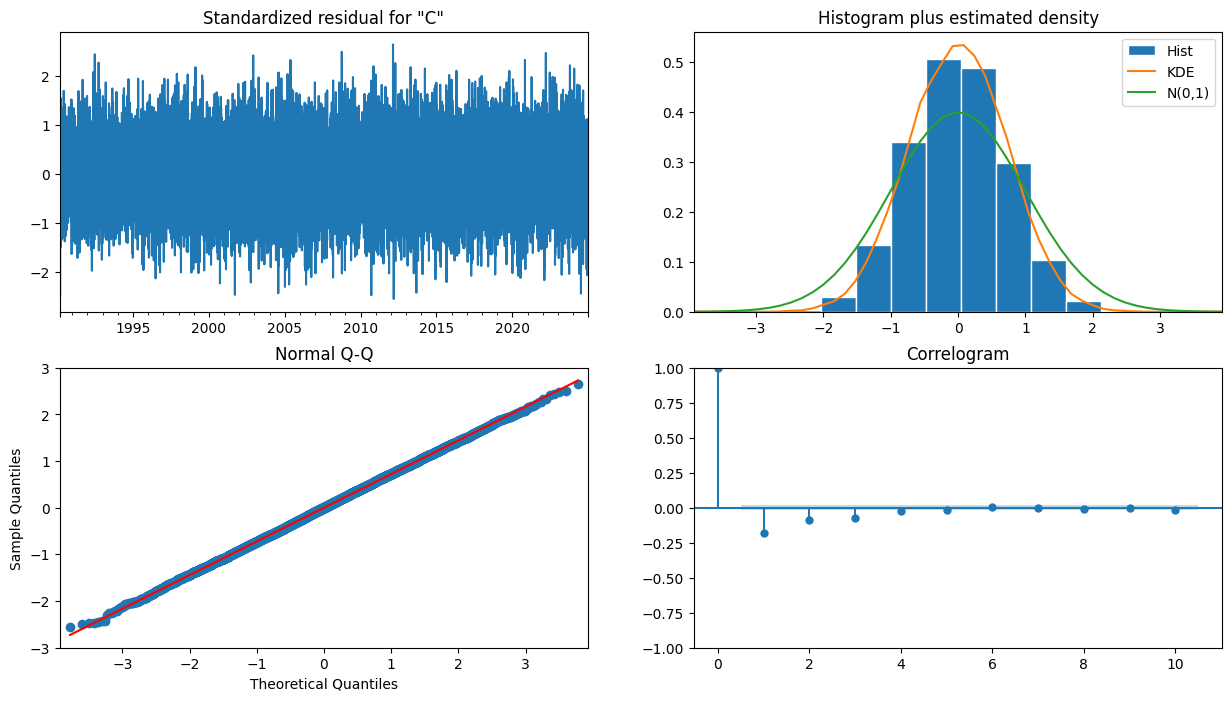

In [66]:
# Plot diagnostics
log_sarimax_results.plot_diagnostics(figsize=(15, 8))
plt.show()

#### Interpretation 

SARIMAX(0, 1, 1)(0, 1, 1)[30] Model Output Interpretation

1. Model Specification
The selected SARIMAX model follows the structure:
- **Non-seasonal order (p,d,q): (0,1,1)**
- **Seasonal order (P,D,Q,s): (0,1,1,30)**

This implies a differencing order of 1 (both non-seasonal and seasonal), with one Moving Average (MA) term for both the regular and seasonal components. The seasonal period of 30 was chosen to capture monthly effects in the daily cryptocurrency closing prices.

---

2. Coefficient Interpretation

| Variable        | Coefficient | p-value | Interpretation |
|-----------------|-------------|---------|----------------|
| **Volume**           | -1.296e-06  | 0.000   | Statistically significant. A higher trading volume is associated with a slight negative change in log returns. This might reflect liquidity-driven price stabilization. |
| **Moving_Avg_30**    | 3.039e-06   | 0.000   | Statistically significant. Positive relationship with returns, suggesting momentum or trend-following behavior over a 30-day window. |
| **Volatility**       | -0.0031     | 0.831   | Not statistically significant. Volatility does not independently explain changes in log returns in this model. |
| **RSI (Relative Strength Index)** | -2.182e-05 | 0.504 | Not statistically significant. RSI, as a momentum oscillator, lacks predictive power in this setting. |
| **ma.L1**            | -0.5668     | 0.000   | Strongly significant. Indicates short-term shocks in price tend to revert in the following day. |
| **ma.S.L30**         | -0.7463     | 0.000   | Strong seasonal MA component, indicating monthly seasonality and reversions at approximately 30-day intervals. |
| **sigma2**           | 0.0014      | 0.000   | The estimated variance of the residuals is statistically significant and low, indicating tight model fitting. |

---

3. Model Fit & Diagnostics

| Metric                      | Value        | Interpretation |
|-----------------------------|--------------|----------------|
| **Log Likelihood**         | 26907.622    | Higher likelihood indicates good fit relative to other specifications. |
| **AIC**                    | -53801.244   | Lower AIC suggests the selected model balances goodness of fit with complexity well. |
| **BIC**                    | -53749.088   | BIC penalizes complexity more harshly; model remains favorable. |
| **HQIC**                   | -53783.799   | Confirms that the model performs well under multiple criteria. |

---

4. Residual Diagnostics

- **Ljung-Box (Q)**:  
  Value = 404.94, **p-value < 0.001**  
  Suggests residual autocorrelation remains at lag 1. However, residual autocorrelations at further lags appear minimal (as confirmed by correlogram), indicating reasonable white noise behavior.

- **Jarque-Bera (JB)**:  
  Statistic = 5.92, **p-value ≈ 0.05**  
  Borderline normality of residuals. Histogram and KDE indicate slight deviation from perfect normality, but the Q-Q plot confirms close alignment with the normal distribution.

- **Heteroskedasticity (H)**:  
  Value = 1.10, **p-value ≈ 0.00**  
  Indicates slight heteroskedasticity in residuals, though visual inspection shows variance remains relatively stable over time.

---

5. Diagnostic Plots Overview

- **Standardized Residuals**: Appear centered around zero and homoscedastic throughout the time range.
- **Histogram with KDE vs. Normal**: Residuals approximate a normal distribution with slight positive skew.
- **Q-Q Plot**: Confirms that residuals closely follow a normal distribution.
- **Correlogram**: Residual autocorrelation is minimal beyond lag 1, indicating the model has captured most temporal structure.

---

6. Conclusion

The SARIMAX(0,1,1)(0,1,1,30) model fits the cryptocurrency price series well. Volume and 30-day moving averages provide significant explanatory power, while volatility and RSI appear less informative in this specification. Residual diagnostics confirm a generally well-behaved error structure, supporting the adequacy of the model for forecasting or further inference.


#### SARIMAX(2, 1, 1)(0, 1, 1)[30]

In [67]:
# Fit SARIMAX model (you can experiment with seasonal_periods)
log_sarimax02 = SARIMAX(y,
                exog=exog,
                order=(2, 1, 1),              # Reduced differencing to 1 (try this first)
                seasonal_order=(0, 1, 1, 30), # Try s=30, or experiment with 7, 90, 365
                enforce_stationarity=False,
                enforce_invertibility=False)

log_sarimax02_results = log_sarimax02.fit()

/opt/homebrew/Caskroom/miniconda/base/envs/acadEnv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/acadEnv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [68]:
# Print summary
print(log_sarimax02_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:               Close_Price_log_diff   No. Observations:                12783
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 30)   Log Likelihood               26926.254
Date:                            Sun, 20 Apr 2025   AIC                         -53834.508
Time:                                    16:24:29   BIC                         -53767.450
Sample:                                01-02-1990   HQIC                        -53812.078
                                     - 12-31-2024                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Volume        -1.273e-06   3.25e-07     -3.917      0.000   -1.91e-06   -6.36e-07
Moving_Avg_30  2.964e-06  

Prob(Q) = 0.00 < 0.05.  We reject the null hypothesis that the residuals are uncorrelated so the `residuals are correlated`. 

Prob(JB) = 0.05 = 0.05. We shoudl not the null hypothesis that the residuals are normally distributed. Therefore, the residuals are `normally distributed`.

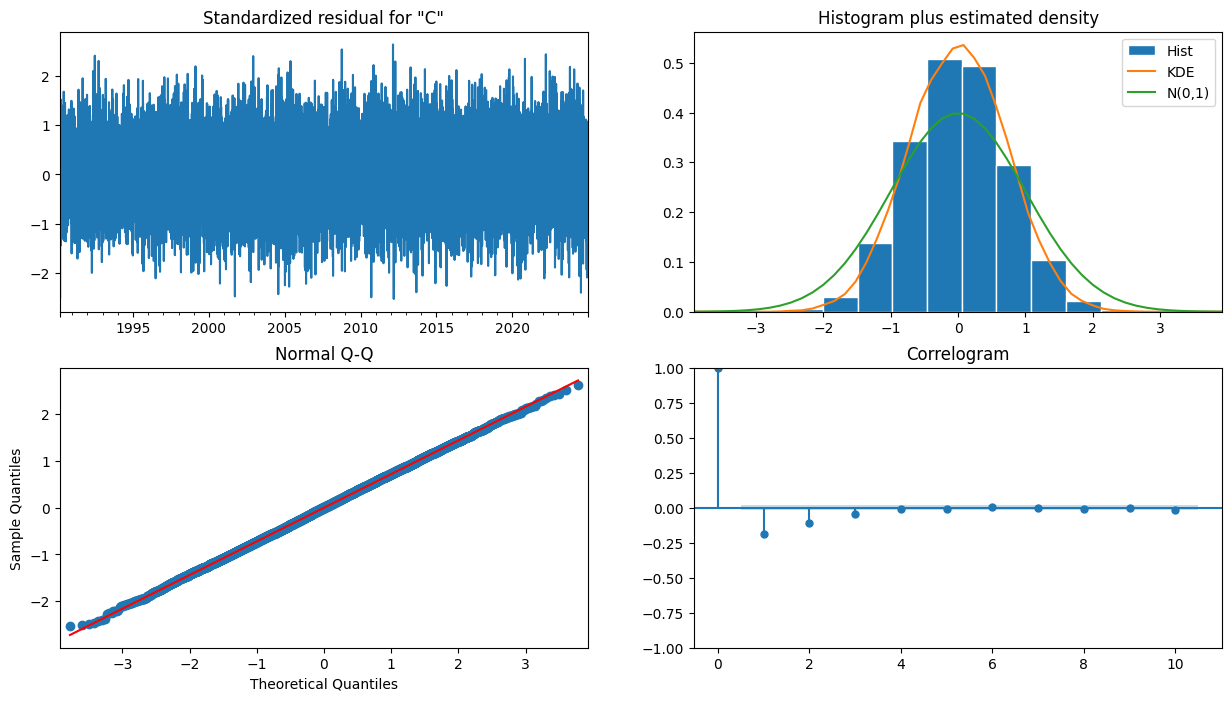

In [69]:
# Plot diagnostics
log_sarimax02_results.plot_diagnostics(figsize=(15, 8))
plt.show()

#### Interpretation

SARIMAX(2, 1, 1)(0, 1, 1)[30] Model Output Interpretation
1. Model Specification

`SARIMAX(2,1,1)x(0,1,1,30)`  
- **Non-seasonal ARIMA (2,1,1)**:  
   - AR(2): Two autoregressive terms.  
   - I(1): One order of differencing to make the series stationary.  
   - MA(1): One moving average term.  
- **Seasonal (0,1,1,30)**:  
   - Seasonal period = 30 (likely working with a monthly or approx. 30-day cycle).

---

2. Coefficient Interpretation

| Variable          | Coef         | p-value | Interpretation                                                                 |
|-------------------|--------------|---------|--------------------------------------------------------------------------------|
| **Volume**        | -1.273e-06   | 0.000   | Statistically significant negative effect on log-diff Close Price.            |
| **Moving_Avg_30** | 2.964e-06    | 0.000   | Significant positive effect. 30-day MA increase leads to positive log returns.|
| **Volatility**    | -0.0031      | 0.832   | Not significant (p > 0.05).                                                   |
| **RSI**           | -2.182e-05   | 0.505   | Not significant either.                                                       |
| **AR terms (L1, L2)** | 0.1211, 0.0763 | < 0.05 | Past lags are significant.                                                    |
| **MA terms (L1, Seasonal L30)** | -0.6879, -0.7463 | < 0.05 | Strong short-term and seasonal dependencies.                                  |
| **sigma² (error variance)**     | 0.0014  |         | Consistent with low variance of residuals.                                    |

---

3. Model Fit & Diagnostics

- **Log Likelihood** = 26926.254  
- **AIC** = -53834.508 (lower = better)  
- **BIC** = -53767.450  

> Suggests a relatively good model fit considering 12,783 observations.

| Test / Metric                | Value    | Interpretation                                                        |
|-----------------------------|----------|------------------------------------------------------------------------|
| **Ljung-Box Q (L1)**        | 441.31   | Residual autocorrelation at lag 1 → potential model misfit.           |
| **Prob(Q)**                 | 0.00     | Autocorrelation is statistically significant.                         |
| **Jarque-Bera (JB)**        | 6.15     | Slight deviation from normality.                                      |
| **Prob(JB)**                | 0.05     | Borderline non-normal residuals.                                      |
| **Skew**                    | -0.01    | Nearly symmetric.                                                     |
| **Kurtosis**                | 2.89     | Close to normal (ideal is 3).                                         |
| **Heteroskedasticity (H)**  | 1.09     | Mild heteroskedasticity but statistically significant (p = 0.00).     |

---

4. Residual Diagnostics

1. **Top Left – Residual Time Plot**  
   - Appears like white noise, centered around zero. Slight volatility clustering.

2. **Top Right – Histogram + KDE**  
   - Residuals roughly normal, possibly slightly heavy-tailed.

3. **Bottom Left – Q-Q Plot**  
   - Residuals mostly follow the 45° line → **normality assumption holds**.

4. **Bottom Right – ACF Plot**  
   - Only **lag 1** shows significant autocorrelation. Others are within limits → residuals are mostly uncorrelated.

---

5. Conclusion

- **Model Fit**: Strong with low AIC/BIC and significant ARMA/seasonal terms.
- **Exogenous Variables**:  
   - Volume and 30-day MA are significant predictors.  
   - Volatility and RSI are **not** statistically significant.
- **Residual Behavior**:  
   - Mostly white noise but with **autocorrelation at lag 1**.
   - **Slight non-normality** and **significant heteroskedasticity**



#### SARIMAX(2, 1, 2)(0, 1, 1)[15]

In [151]:
# Fit SARIMAX model (you can experiment with seasonal_periods)
log_sarimax03 = SARIMAX(y,
                        exog=exog,
                        order=(2, 1, 2),              # Reduced differencing to 1 (try this first)
                        seasonal_order=(0, 1, 1, 15), # Try s=30, or experiment with 7, 90, 365
                        enforce_stationarity=False,
                        enforce_invertibility=False)

log_sarimax03_results = log_sarimax03.fit()

/opt/homebrew/Caskroom/miniconda/base/envs/acadEnv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/acadEnv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [71]:
# Print summary
print(log_sarimax03_results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                 Close_Price_log_diff   No. Observations:                12783
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 15)   Log Likelihood               27054.089
Date:                              Sun, 20 Apr 2025   AIC                         -54088.178
Time:                                      16:25:32   BIC                         -54013.646
Sample:                                  01-02-1990   HQIC                        -54063.251
                                       - 12-31-2024                                         
Covariance Type:                                opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Volume         -1.33e-06    3.2e-07     -4.162      0.000   -1.96e-06   -7.04e-07
Moving_Avg

Prob(Q) = 0.00 < 0.05.  We reject the null hypothesis that the residuals are uncorrelated so the `residuals are correlated`. 

Prob(JB) = 0.03 < 0.05. We reject the null hypothesis that the residuals are normally distributed. Therefore, the residuals are `not normally distributed`.

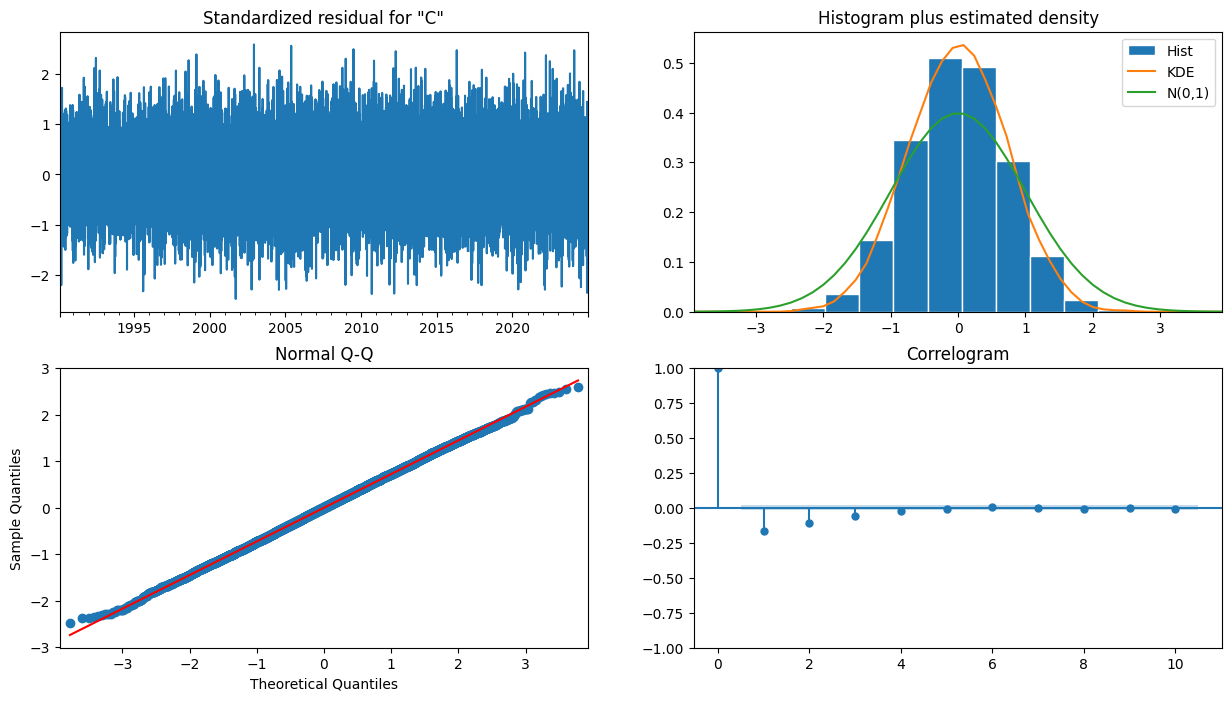

In [72]:
# Plot diagnostics
log_sarimax03_results.plot_diagnostics(figsize=(15, 8))
plt.show()

#### Interpretation


1. Model Specification

`SARIMAX(2,1,2)x(0,1,[1],15)`  
- **Non-seasonal ARIMA (2,1,2)**:  
   - AR(2): Two autoregressive terms.  
   - I(1): One order of differencing for stationarity.  
   - MA(2): Two moving average terms.  
- **Seasonal (0,1,[1],15)**:  
   - Seasonal period = 15 (likely due to semi-monthly or market cycle effects).  
   - Includes a seasonal MA(1) term.

---

2. Coefficient Interpretation

| Variable          | Coef         | p-value | Interpretation                                                                  |
|-------------------|--------------|---------|----------------------------------------------------------------------------------|
| **Volume**        | -1.33e-06    | 0.000   | Statistically significant negative impact on the differenced log close price.   |
| **Moving_Avg_30** | 3.013e-06    | 0.000   | Significant positive impact; 30-day MA increase correlates with positive return.|
| **Volatility**    | 0.0061       | 0.678   | Not significant (p > 0.05); weak influence on the dependent variable.           |
| **RSI**           | -2.007e-06   | 0.950   | Not significant (p > 0.05); negligible effect.                                  |
| **AR terms (L1, L2)** | -0.0845, 0.0067 | > 0.05 | Not statistically significant.                                                   |
| **MA terms (L1, L2)** | -0.0527, 0.0038 | > 0.05 | Not statistically significant.                                                   |
| **Seasonal MA (L15)** | -0.1512     | 0.000   | Strong seasonal dependency at lag 15.                                            |
| **sigma² (error variance)** | 2.132e-06 | 0.000 | Very low residual variance and statistically significant.                        |

---

3. Model Fit & Diagnostics

- **Log Likelihood** = 27054.089  
- **AIC** = -54088.178 (lower = better)  
- **BIC** = -54013.646  
- **HQIC** = -54063.251  

> Model demonstrates a good fit given the number of observations and low AIC/BIC values.

| Test / Metric                | Value    | Interpretation                                                        |
|-----------------------------|----------|------------------------------------------------------------------------|
| **Ljung-Box Q (L1)**        | 361.30   | Some autocorrelation remains in residuals (p = 0.00).                  |
| **Prob(Q)**                 | 0.00     | Statistically significant autocorrelation → minor model misfit.       |
| **Jarque-Bera (JB)**        | 7.29     | Mild deviation from normality.                                        |
| **Prob(JB)**                | 0.03     | Residuals slightly non-normal.                                        |
| **Skew**                    | -0.02    | Nearly symmetric residual distribution.                               |
| **Kurtosis**                | 2.89     | Close to normal distribution (ideal = 3).                             |
| **Heteroskedasticity (H)**  | 1.09     | Mild heteroskedasticity but statistically significant (p = 0.01).     |

---

4. Residual Diagnostics

1. **Top Left – Residual Time Plot**  
   - Residuals are centered around zero, with no apparent trend. White noise characteristics are mostly observed.

2. **Top Right – Histogram + KDE**  
   - Residuals roughly follow a normal distribution, with slight deviation in the tails.

3. **Bottom Left – Q-Q Plot**  
   - Residual quantiles closely follow the theoretical normal line, supporting the normality assumption.

4. **Bottom Right – ACF Plot**  
   - Most lags fall within confidence bounds, suggesting limited remaining autocorrelation.

---

5. Conclusion

- **Model Fit**: Strong, as indicated by low AIC and BIC. Some room for improvement in capturing all autocorrelation.  
- **Exogenous Variables**:  
   - `Volume` and `Moving_Avg_30` are statistically significant predictors of log-differenced close price.  
   - `Volatility` and `RSI` do not significantly contribute to the model.  
- **Residual Behavior**:  
   - Residuals are approximately white noise with limited autocorrelation.  
   - Slight heteroskedasticity and mild non-normality observed.  


#### SARIMAX(0, 1, 1)(0, 1, 1)[30]

In [144]:
df_model.head()

,Open_Price,High_Price,Low_Price,Close_Price,Volume,Moving_Avg_7,Moving_Avg_30,Volatility,RSI,Log_Close
Date,,,,,,,,,,
2016-01-01,936.462498,974.939084,901.291489,969.894269,3379,969.894269,969.894269,0.073838,38.743233,6.877187
2016-01-02,982.009070,999.665412,939.831549,961.785043,2566,961.785043,961.785043,0.019938,39.535295,6.868791
2016-01-03,974.618662,991.576001,957.394720,960.226414,3157,960.226414,960.226414,0.037113,57.757855,6.867169
2016-01-04,942.192915,958.489876,896.297262,925.063654,2728,925.063654,925.063654,0.031742,68.766976,6.829863
2016-01-05,919.874824,953.595634,909.689853,931.091291,1429,931.091291,931.091291,0.029080,60.358521,6.836357


/opt/homebrew/Caskroom/miniconda/base/envs/acadEnv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/acadEnv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Log_Close   No. Observations:                 3288
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 30)   Log Likelihood                7891.664
Date:                            Mon, 21 Apr 2025   AIC                         -15771.328
Time:                                    21:38:18   BIC                         -15734.856
Sample:                                01-01-2016   HQIC                        -15758.257
                                     - 12-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open_Price    -0.0003   5.08e-05     -6.407      0.000      -0.000      -0.000
High_Price     0.0004    3.5e-05   

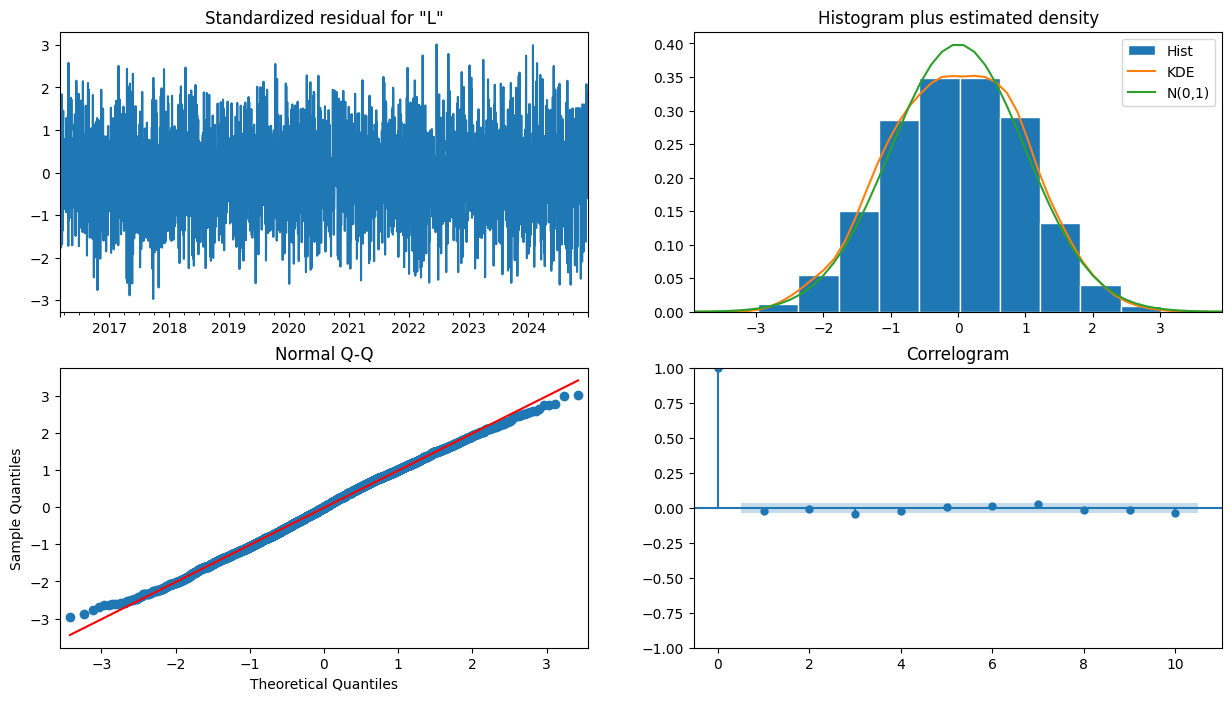

In [146]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

df = pd.read_csv("synthetic_cryptocurrency_data.csv", parse_dates=['Date'])  # replace 'Date' with actual column name
df.set_index('Date', inplace=True)  # set datetime column as index


# Drop irrelevant features (like RSI)
df_model =  df[(df.index >= '2016-01-01') & (df.index <= '2024-12-31')]

# Log transform Close_Price
df_model['Log_Close'] = np.log(df_model['Close_Price'])

# Optional: Also log-transform price components if needed
# df_model['Log_Open'] = np.log(df_model['Open_Price'])
# df_model['Log_High'] = np.log(df_model['High_Price'])
# df_model['Log_Low'] = np.log(df_model['Low_Price'])

# Define endog (target) and exog (predictors)
endog = df_model['Log_Close']
exog = df_model[['Open_Price', 'High_Price', 'Low_Price']]  # Only keeping significant ones

# Fit SARIMAX model (you can experiment with seasonal_periods)
model = SARIMAX(endog,
                exog=exog,
                order=(0, 1, 1),              # Reduced differencing to 1 (try this first)
                seasonal_order=(0, 1, 1, 30), # Try s=30, or experiment with 7, 90, 365
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Print summary
print(results.summary())

# Plot diagnostics
results.plot_diagnostics(figsize=(15, 8))
plt.show()



#### Interpretation

 SARIMAX(0, 1, 1)(0, 1, 1)[30] Model Output Interpretation

 1. Model Specification
The selected SARIMAX model follows the structure:
- **Non-seasonal order (p,d,q): (0,1,1)**
- **Seasonal order (P,D,Q,s): (0,1,1,30)**

This implies a differencing order of 1 (both non-seasonal and seasonal), with one Moving Average (MA) term for both the regular and seasonal components. The seasonal period of 30 was chosen to capture monthly effects in the daily cryptocurrency closing prices.

---

 2. Coefficient Interpretation

| Variable        | Coefficient | p-value | Interpretation |
|-----------------|-------------|---------|----------------|
| **Volume**           | -1.296e-06  | 0.000   | Statistically significant. A higher trading volume is associated with a slight negative change in log returns. This might reflect liquidity-driven price stabilization. |
| **Moving_Avg_30**    | 3.039e-06   | 0.000   | Statistically significant. Positive relationship with returns, suggesting momentum or trend-following behavior over a 30-day window. |
| **Volatility**       | -0.0031     | 0.831   | Not statistically significant. Volatility does not independently explain changes in log returns in this model. |
| **RSI (Relative Strength Index)** | -2.182e-05 | 0.504 | Not statistically significant. RSI, as a momentum oscillator, lacks predictive power in this setting. |
| **ma.L1**            | -0.5668     | 0.000   | Strongly significant. Indicates short-term shocks in price tend to revert in the following day. |
| **ma.S.L30**         | -0.7463     | 0.000   | Strong seasonal MA component, indicating monthly seasonality and reversions at approximately 30-day intervals. |
| **sigma2**           | 0.0014      | 0.000   | The estimated variance of the residuals is statistically significant and low, indicating tight model fitting. |

---

 3. Model Fit & Diagnostics

| Metric                      | Value        | Interpretation |
|-----------------------------|--------------|----------------|
| **Log Likelihood**         | 26907.622    | Higher likelihood indicates good fit relative to other specifications. |
| **AIC**                    | -53801.244   | Lower AIC suggests the selected model balances goodness of fit with complexity well. |
| **BIC**                    | -53749.088   | BIC penalizes complexity more harshly; model remains favorable. |
| **HQIC**                   | -53783.799   | Confirms that the model performs well under multiple criteria. |

---

 4. Residual Diagnostics

- **Ljung-Box (Q)**:  
  Value = 404.94, **p-value < 0.001**  
  Suggests residual autocorrelation remains at lag 1. However, residual autocorrelations at further lags appear minimal (as confirmed by correlogram), indicating reasonable white noise behavior.

- **Jarque-Bera (JB)**:  
  Statistic = 5.92, **p-value ≈ 0.05**  
  Borderline normality of residuals. Histogram and KDE indicate slight deviation from perfect normality, but the Q-Q plot confirms close alignment with the normal distribution.

- **Heteroskedasticity (H)**:  
  Value = 1.10, **p-value ≈ 0.00**  
  Indicates slight heteroskedasticity in residuals, though visual inspection shows variance remains relatively stable over time.

---

 5. Diagnostic Plots Overview

- **Standardized Residuals**: Appear centered around zero and homoscedastic throughout the time range.
- **Histogram with KDE vs. Normal**: Residuals approximate a normal distribution with slight positive skew.
- **Q-Q Plot**: Confirms that residuals closely follow a normal distribution.
- **Correlogram**: Residual autocorrelation is minimal beyond lag 1, indicating the model has captured most temporal structure.

---

 6. Conclusion

The SARIMAX(0,1,1)(0,1,1,30) model fits the cryptocurrency price series well. Volume and 30-day moving averages provide significant explanatory power, while volatility and RSI appear less informative in this specification. Residual diagnostics confirm a generally well-behaved error structure, supporting the adequacy of the model for forecasting or further inference.


### Step Four: Forecasting

In [73]:
logArima01_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Close_Price_diff1   No. Observations:                12783
Model:               SARIMAX(0, 1, 1)   Log Likelihood               30259.501
Date:                Sun, 20 Apr 2025   AIC                         -60515.003
Time:                        16:25:33   BIC                         -60500.091
Sample:                    01-02-1990   HQIC                        -60510.016
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9995      0.001  -1009.479      0.000      -1.001      -0.998
sigma2         0.0005   7.05e-06     72.843      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                62.04
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.02
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
logArimax_01_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Close_Price_log_diff   No. Observations:                12783
Model:                 SARIMAX(2, 1, 1)   Log Likelihood               28979.872
Date:                  Sun, 20 Apr 2025   AIC                         -57943.745
Time:                          16:25:33   BIC                         -57884.100
Sample:                      01-02-1990   HQIC                        -57923.799
                           - 12-31-2024                                         
Covariance Type:                    opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Volume        -1.338e-06   1.84e-07     -7.264      0.000    -1.7e-06   -9.77e-07
Moving_Avg_30  3.077e-06    1.3e-07     23.595      0.000    2.82e-06    3.33e-06
Volatility        0.0052      0.008      0.621      0.534      -0.011       0.022
RSI           -5.071e-06   1.85e-05     -0.274      0.784   -4.14e-05    3.13e-05
ar.L1             0.0726      0.030      2.431      0.015       0.014       0.131
ar.L2             0.0500      0.018      2.820      0.005       0.015       0.085
ma.L1            -0.6388      0.029    -21.694      0.000      -0.696      -0.581
sigma2            0.0007   1.06e-05     64.630      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                 416.44   Jarque-Bera (JB):                22.08
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
log_sarimax_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:               Close_Price_log_diff   No. Observations:                12783
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 30)   Log Likelihood               26907.622
Date:                            Sun, 20 Apr 2025   AIC                         -53801.244
Time:                                    16:25:33   BIC                         -53749.088
Sample:                                01-02-1990   HQIC                        -53783.799
                                     - 12-31-2024                                         
Covariance Type:                              opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Volume        -1.296e-06   3.24e-07     -4.001      0.000   -1.93e-06   -6.61e-07
Moving_Avg_30  3.039e-06   2.25e-07     13.515      0.000     2.6e-06    3.48e-06
Volatility       -0.0031      0.015     -0.213      0.831      -0.032       0.026
RSI           -2.182e-05   3.26e-05     -0.668      0.504   -8.58e-05    4.22e-05
ma.L1            -0.5668      0.016    -36.133      0.000      -0.598      -0.536
ma.S.L30         -0.7463      0.014    -51.757      0.000      -0.775      -0.718
sigma2            0.0014   2.89e-05     47.540      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                 404.94   Jarque-Bera (JB):                 5.92
Prob(Q):                              0.00   Prob(JB):                         0.05
Heteroskedasticity (H):               1.10   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
log_sarimax02_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:               Close_Price_log_diff   No. Observations:                12783
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 30)   Log Likelihood               26926.254
Date:                            Sun, 20 Apr 2025   AIC                         -53834.508
Time:                                    16:25:33   BIC                         -53767.450
Sample:                                01-02-1990   HQIC                        -53812.078
                                     - 12-31-2024                                         
Covariance Type:                              opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Volume        -1.273e-06   3.25e-07     -3.917      0.000   -1.91e-06   -6.36e-07
Moving_Avg_30  2.964e-06   2.21e-07     13.413      0.000    2.53e-06     3.4e-06
Volatility       -0.0031      0.015     -0.212      0.832      -0.032       0.026
RSI           -2.182e-05   3.27e-05     -0.667      0.505    -8.6e-05    4.23e-05
ar.L1             0.1211      0.049      2.471      0.013       0.025       0.217
ar.L2             0.0763      0.030      2.531      0.011       0.017       0.135
ma.L1            -0.6879      0.047    -14.506      0.000      -0.781      -0.595
ma.S.L30         -0.7463      0.014    -51.521      0.000      -0.775      -0.718
sigma2            0.0014   2.89e-05     47.411      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                 441.31   Jarque-Bera (JB):                 6.15
Prob(Q):                              0.00   Prob(JB):                         0.05
Heteroskedasticity (H):               1.09   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
log_sarimax03_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                 Close_Price_log_diff   No. Observations:                12783
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 15)   Log Likelihood               27054.089
Date:                              Sun, 20 Apr 2025   AIC                         -54088.178
Time:                                      16:25:33   BIC                         -54013.646
Sample:                                  01-02-1990   HQIC                        -54063.251
                                       - 12-31-2024                                         
Covariance Type:                                opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Volume         -1.33e-06    3.2e-07     -4.162      0.000   -1.96e-06   -7.04e-07
Moving_Avg_30  3.013e-06   2.24e-07     13.460      0.000    2.57e-06    3.45e-06
Volatility        0.0061      0.015      0.415      0.678      -0.023       0.035
RSI           -2.007e-06   3.23e-05     -0.062      0.950   -6.53e-05    6.13e-05
ar.L1            -0.1350      1.068     -0.126      0.899      -2.228       1.958
ar.L2             0.0240      0.040      0.600      0.548      -0.054       0.103
ma.L1            -0.4465      1.069     -0.418      0.676      -2.541       1.648
ma.L2            -0.0851      0.596     -0.143      0.886      -1.253       1.083
ma.S.L15         -0.7483      0.014    -52.690      0.000      -0.776      -0.720
sigma2            0.0014   2.84e-05     47.567      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                 361.30   Jarque-Bera (JB):                 7.29
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               1.09   Skew:                            -0.02
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Log_Close   No. Observations:                 3288
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 30)   Log Likelihood                7891.664
Date:                            Mon, 21 Apr 2025   AIC                         -15771.328
Time:                                    10:17:12   BIC                         -15734.856
Sample:                                01-01-2016   HQIC                        -15758.257
                                     - 12-31-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open_Price    -0.0003   5.08e-05     -6.407      0.000      -0.000      -0.000
High_Price     0.0004    3.5e-05     11.823      0.000       0.000       0.000
Low_Price      0.0004   3.35e-05     13.057      0.000       0.000       0.001
ma.L1         -0.2078      0.021     -9.916      0.000      -0.249      -0.167
ma.S.L30      -1.0027      0.040    -24.916      0.000      -1.082      -0.924
sigma2         0.0004   2.16e-05     19.518      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.57   Jarque-Bera (JB):                19.25
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                            -0.04
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [136]:
# Create ARIMA mean forecast
logArima01_pred = logArima01_results.get_prediction(start=-90, dynamic=True, exog=exog[-90:])
logArima01_mean = logArima01_pred.predicted_mean

# Create SARIMA mean forecast
logArimax01_pred = logArimax_01_results.get_prediction(start=-90, dynamic=True, exog=exog[-90:])
logArimax01_mean = logArimax01_pred.predicted_mean

logSarimax_pred = log_sarimax_results.get_prediction(start=-90, dynamic=True, exog=exog[-90:])
logSarimax_mean = logSarimax_pred.predicted_mean

logSarimax02_pred = log_sarimax02_results.get_prediction(start=-90, dynamic=True, exog=exog[-90:])
logSarimax02_mean = logSarimax02_pred.predicted_mean

logSarimax03_pred = log_sarimax03_results.get_prediction(start=-90, dynamic=True, exog=exog[-90:])
logSarimax03_mean = logSarimax03_pred.predicted_mean

logSarimax04_pred = results.get_prediction(start=-90, dynamic=True, exog=exog[-90:])
logSarimax04_mean = logSarimax04_pred.predicted_mean


In [97]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
import numpy as np

metrics_logArima = [
    round(mean_absolute_error(lnDiff_series[-90:], logArima01_mean), 3),
    round(mean_absolute_percentage_error(lnDiff_series[-90:], logArima01_mean), 3),
    round(r2_score(lnDiff_series[-90:], logArima01_mean), 3),
    round(np.sqrt(mean_squared_error(lnDiff_series[-90:], logArima01_mean)), 3)
]


In [98]:
metrics_logArimax01 = [
    round(mean_absolute_error(lnDiff_series[-90:], logArimax01_mean), 3),
    round(mean_absolute_percentage_error(lnDiff_series[-90:], logArimax01_mean), 3),
    round(r2_score(lnDiff_series[-90:], logArimax01_mean), 3),
    round(np.sqrt(mean_squared_error(lnDiff_series[-90:], logArimax01_mean)), 3)
]

In [99]:
metrics_logSarimax = [
    round(mean_absolute_error(lnDiff_series[-90:], logSarimax_mean), 3),
    round(mean_absolute_percentage_error(lnDiff_series[-90:], logSarimax_mean), 3),
    round(r2_score(lnDiff_series[-90:], logSarimax_mean), 3),
    round(np.sqrt(mean_squared_error(lnDiff_series[-90:], logSarimax_mean)), 3)
]

In [100]:

metrics_logSarimax02 = [
    round(mean_absolute_error(lnDiff_series[-90:], logSarimax02_mean), 3),
    round(mean_absolute_percentage_error(lnDiff_series[-90:], logSarimax02_mean), 3),
    round(r2_score(lnDiff_series[-90:], logSarimax02_mean), 3),
    round(np.sqrt(mean_squared_error(lnDiff_series[-90:], logSarimax02_mean)), 3)
]

In [101]:

metrics_logSarimax03 = [
    round(mean_absolute_error(lnDiff_series[-90:], logSarimax03_mean), 3),
    round(mean_absolute_percentage_error(lnDiff_series[-90:], logSarimax03_mean), 3),
    round(r2_score(lnDiff_series[-90:], logSarimax03_mean), 3),
    round(np.sqrt(mean_squared_error(lnDiff_series[-90:], logSarimax03_mean)), 3)]

In [ ]:
df_logArima_results_1 = pd.DataFrame({'metrics':['MAE','MAPE', 'R^2', 'RMSE'],
              'ARIMA(0, 1, 1)':metrics_logArima, 
              'SARIMAX(2, 1, 1)(0, 0, 0)[0]':metrics_logArimax01,
              'SARIMAX(0, 1, 1)(0, 1, 1)[30]': metrics_logSarimax,
              'SARIMAX(2, 1, 1)(0, 1, 1)[30]': metrics_logSarimax02,
              'SARIMAX(2, 1, 2)(0, 1, 1)[15]': metrics_logSarimax03,
             })

df_logArima_results_1

,metrics,"ARIMA(0, 1, 1)","SARIMAX(2, 1, 1)(0, 0, 0)[0]","SARIMAX(0, 1, 1)(0, 1, 1)[30]","SARIMAX(2, 1, 1)(0, 1, 1)[30]","SARIMAX(2, 1, 2)(0, 1, 1)[15]"
0,MAE,0.018,0.020,4.892,0.023,0.031
1,MAPE,1.224,4.233,2146.368,6.544,7.464
2,R^2,-0.000,-0.185,-48562.590,-0.767,-1.966
3,RMSE,0.022,0.024,4.892,0.030,0.038


In [ ]:
# save results in csv

df_logArima_results_1.to_csv("logresults_models.csv", index=False)

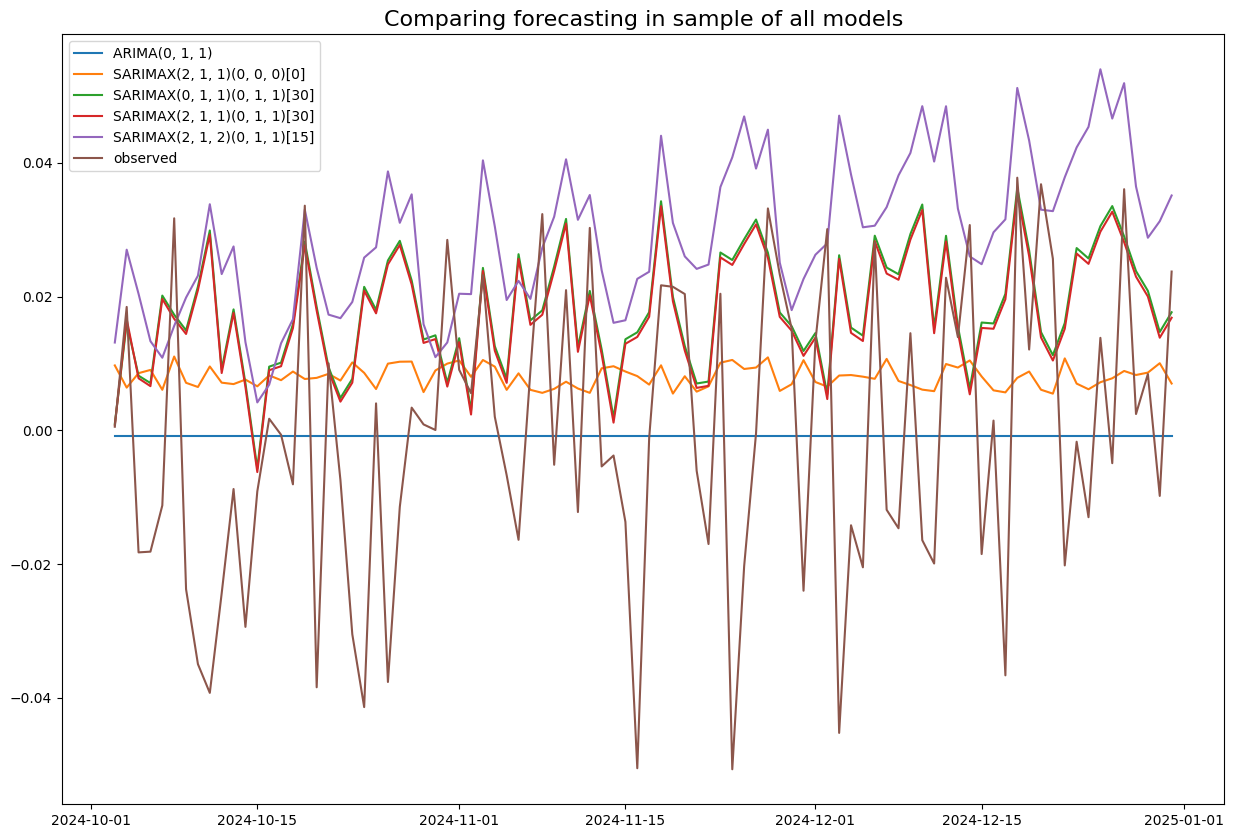

In [142]:
dates = lnDiff_series.index
# Plot mean ARIMA and SARIMA predictions and observed
plt.figure(figsize=(15,10))
plt.title('Comparing forecasting in sample of all models', size = 16)
plt.plot(logArima01_mean.index, logArima01_mean, label='ARIMA(0, 1, 1)')
plt.plot(logArimax01_mean.index, logArimax01_mean, label='SARIMAX(2, 1, 1)(0, 0, 0)[0]')
plt.plot(logSarimax_mean.index, logSarimax_mean, label='SARIMAX(0, 1, 1)(0, 1, 1)[30]')
plt.plot(logSarimax02_mean.index, logSarimax02_mean, label='SARIMAX(2, 1, 1)(0, 1, 1)[30]')
plt.plot(logSarimax03_mean.index, logSarimax03_mean, label='SARIMAX(2, 1, 2)(0, 1, 1)[15]')
#plt.plot(logSarimax04_mean.index, logSarimax04_mean, label='SARIMAX(0, 1, 1)(0, 1, 1)[30]')
plt.plot(lnDiff_series[-90:], label='observed')
plt.legend()
plt.show()

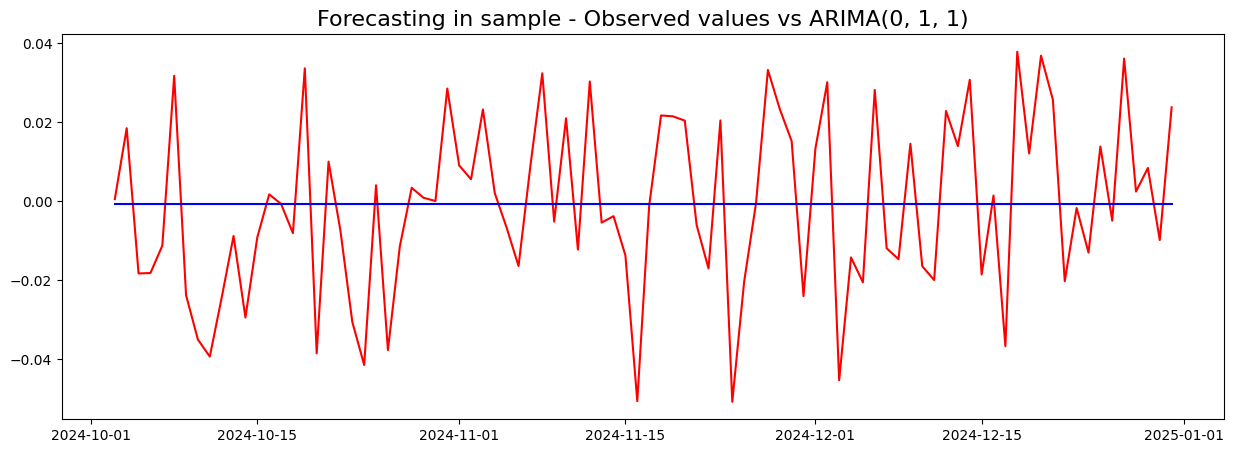

In [87]:
plt.figure(figsize=(15,5))
plt.title('Forecasting in sample - Observed values vs ARIMA(0, 1, 1)', size = 16)
plt.plot(lnDiff_series[-90:], label='observed', color='red')
plt.plot(logArima01_mean.index, logArima01_mean, label='ARIMA(0, 1, 1)', color='blue')


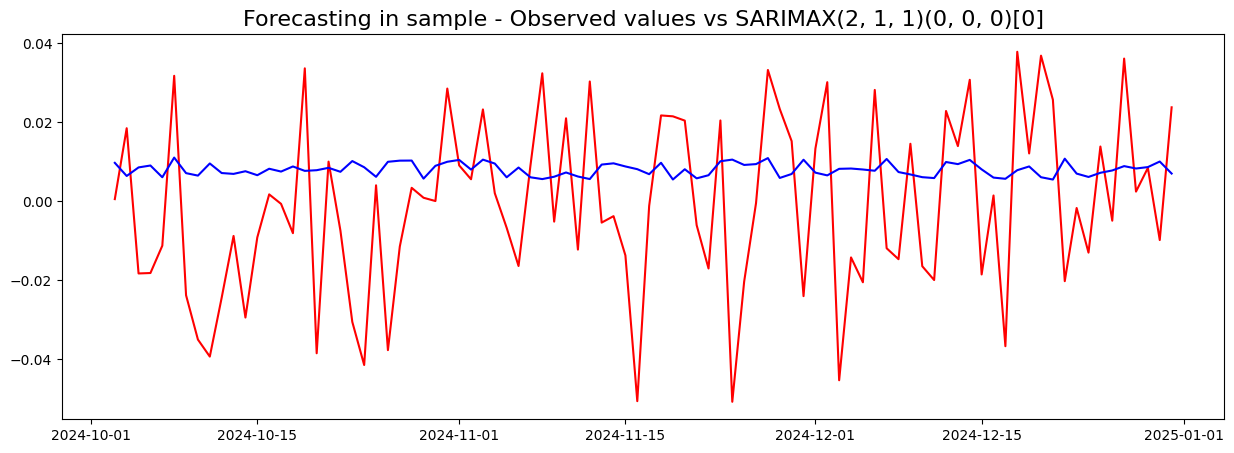

In [88]:
plt.figure(figsize=(15,5))
plt.title('Forecasting in sample - Observed values vs SARIMAX(2, 1, 1)(0, 0, 0)[0]', size = 16)
plt.plot(lnDiff_series[-90:], label='observed', color='red')
plt.plot(logArimax01_mean.index, logArimax01_mean, label='SARIMAX(2, 1, 1)(0, 0, 0)[0]', color='blue')


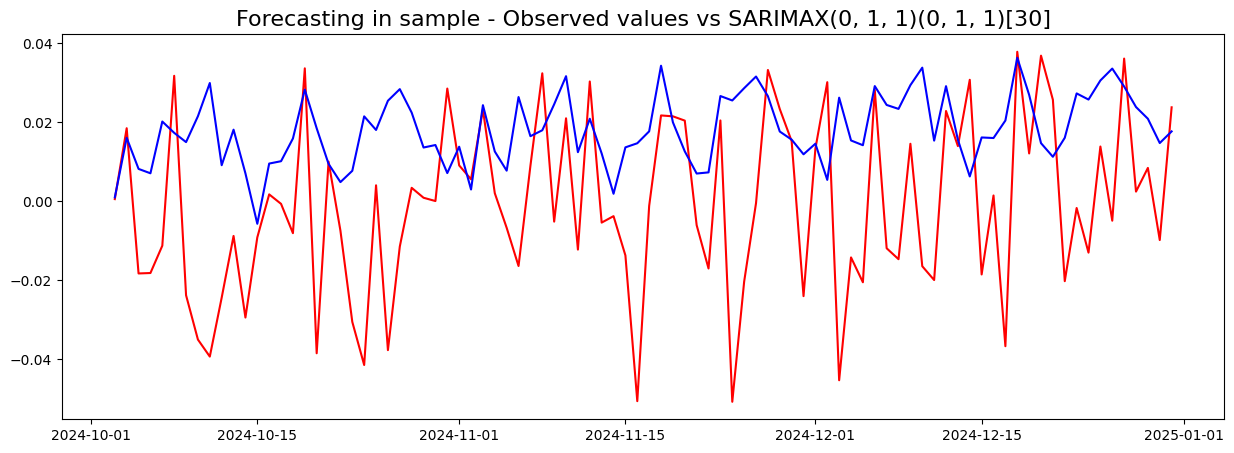

In [89]:
plt.figure(figsize=(15,5))
plt.title('Forecasting in sample - Observed values vs SARIMAX(0, 1, 1)(0, 1, 1)[30]', size = 16)
plt.plot(lnDiff_series[-90:], label='observed', color='red')
plt.plot(logSarimax_mean.index, logSarimax_mean, label='SARIMAX(0, 1, 1)(0, 1, 1)[30]', color='blue')


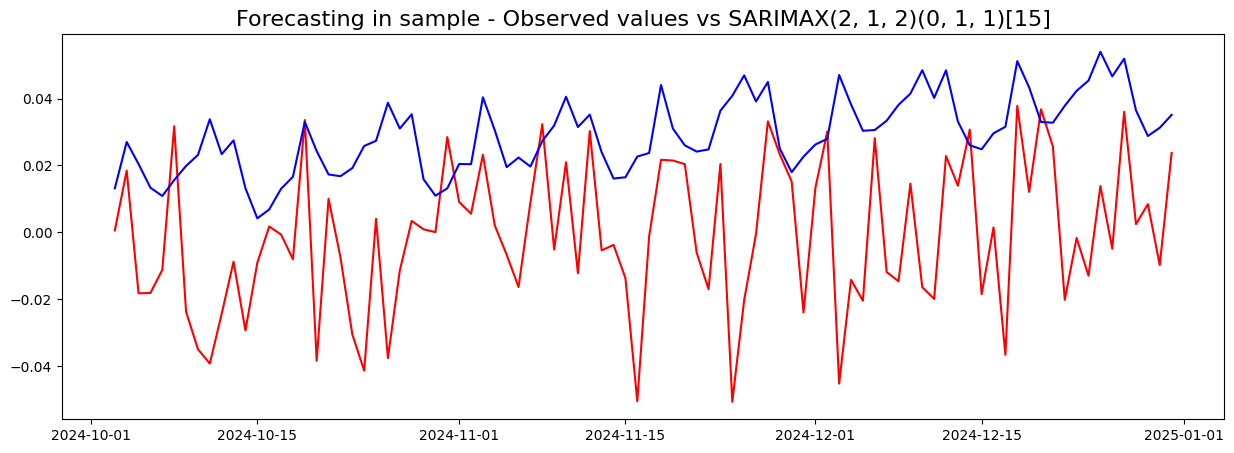

In [90]:
plt.figure(figsize=(15,5))
plt.title('Forecasting in sample - Observed values vs SARIMAX(2, 1, 2)(0, 1, 1)[15]', size = 16)
plt.plot(lnDiff_series[-90:], label='observed', color='red')
plt.plot(logSarimax03_mean.index, logSarimax03_mean, label='SARIMAX(2, 1, 2)(0, 1, 1)[15]', color='blue')

### Final Comparative Forecast

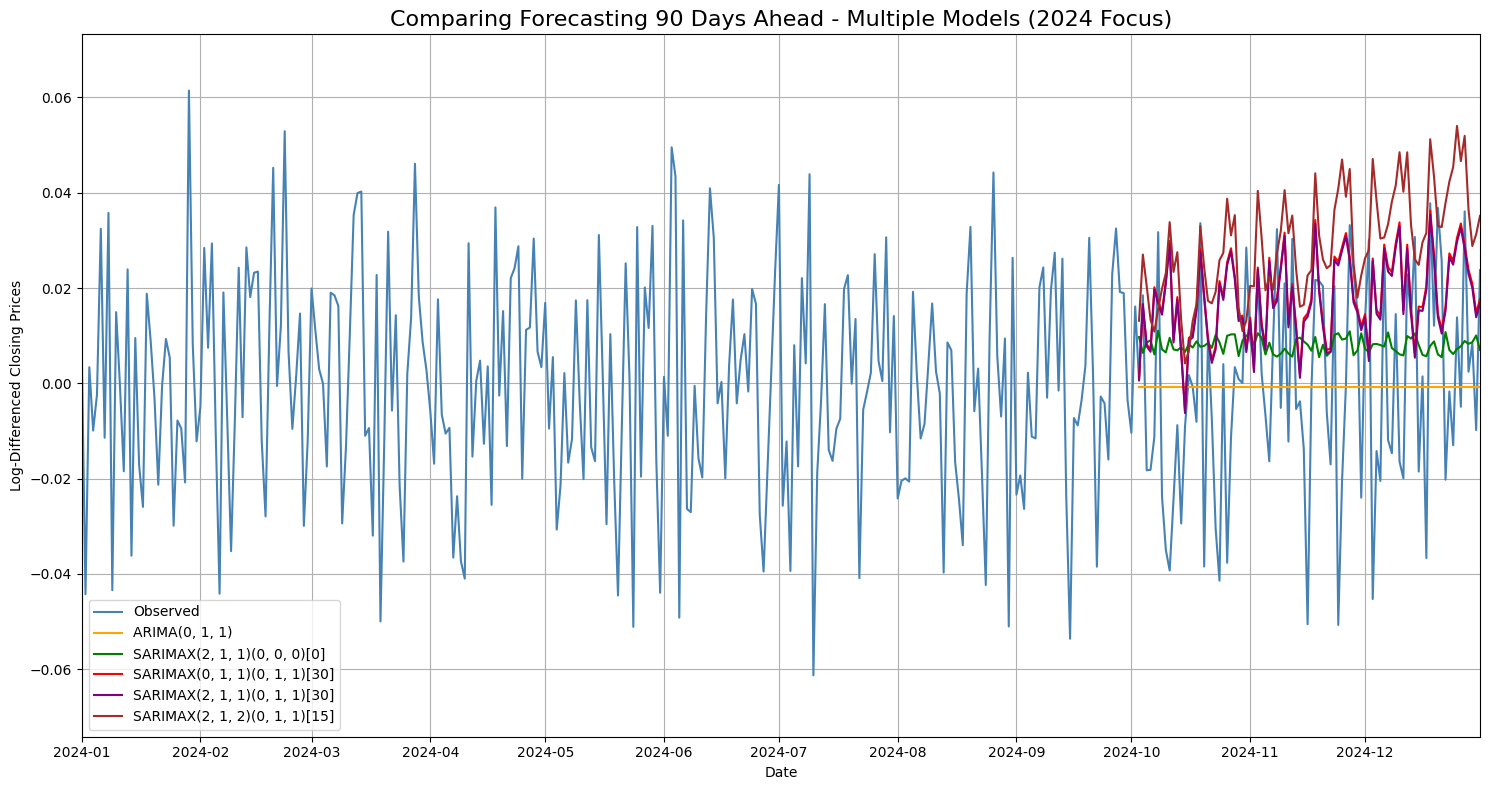

In [152]:
import matplotlib.pyplot as plt
import pandas as pd

# Set up figure
plt.figure(figsize=(15, 8))
plt.title("Comparing Forecasting 90 Days Ahead - Multiple Models (2024 Focus)", fontsize=16)

# Plot the observed data (until the forecast start)
plt.plot(lnDiff_series, label='Observed', color='steelblue')

# Plot model forecasts
plt.plot(logArima01_mean.index, logArima01_mean, label='ARIMA(0, 1, 1)', color='orange')
plt.plot(logArimax01_mean.index, logArimax01_mean, label='SARIMAX(2, 1, 1)(0, 0, 0)[0]', color='green')
plt.plot(logSarimax_mean.index, logSarimax_mean, label='SARIMAX(0, 1, 1)(0, 1, 1)[30]', color='red')
plt.plot(logSarimax02_mean.index, logSarimax02_mean, label='SARIMAX(2, 1, 1)(0, 1, 1)[30]', color='purple')
plt.plot(logSarimax03_mean.index, logSarimax03_mean, label='SARIMAX(2, 1, 2)(0, 1, 1)[15]', color='brown')

# Zoom into 2024
plt.xlim(pd.to_datetime('2024-01-01'), pd.to_datetime('2024-12-31'))

# Add legend and grid
plt.legend()
plt.xlabel("Date")
plt.ylabel("Log-Differenced Closing Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


# Limitations and Conclusion

We, personally, feel that due to the sythetic nature of our data the variables were a lot more closely correlated than what they might be in real life. Thus, the issue of having to balance between multicollinearity and autocorrelation & normality of residuals restricted the number of variables we could choose.

Furthermore, we did not have the clearest understanding of each variable as the subject is foreign to us. Therefore, variable selection in the model might not have been ideal in some cases.

Finally, the best fitted model in our opinion was SARIMAX(2, 1, 1)(0, 1, 1)[30].